## NAME  - `KUMAR ROHIT`
## BRANCH - `AIML`

# Methodology and Approaches

## 1. Data Understanding and Exploratory Data Analysis (EDA):
- Explored the dataset dimensions/shape, checked for null values, and examined the data types of the features of the dataset.
- Used the pandas describe() method to understand feature datatypes, identifying anomalies like the min value of Sourcing Cost column being negative.
- Conducted Univariate analysis and Multivariate Analysis, including frequency counts, box plots for outlier detection, and histplots for distribution of the Sourcing Cost column.
- Investigated negative values in 'Sourcing Cost' and considered removal or replacement strategies.
- Found the presence of outliers in the Sourcing Cost column

## 2. Pre-processing:
### Outlier Detection and Handling:
- For Outlier detection, the IQR method was used, with two approaches:
  - Removal/Trimming of the outliers from the data.
  - Clipping outliers to lower and upper bound.
- Resulted in four sets of data for further analysis. And for both of these two approaches, I handled the negative sourcing cost values as follows:

### Handling Negative Sourcing Cost Values:
- For handling the negative values, two approaches were considered: removal of the negative vlaues or taking the absolute value fo them.
- Since the number of negative values was relatively small compared to the total dataset size, removing them was chosen as it had minimal impact.

So after pre-processing, I had four sets of data:

1. Dataset with outliers removed and negative values removed as well.
2. Dataset with outliers removed but with the absolute values of the negative sourcing values.
3. Dataset with outliers clipped to the upper and lower bound, and the negative values removed.
4. Dataset with outliers clipped to the upper and lower bound, but with the absolute values of the negative sourcing values.

## 3. Correlation and Association Analysis:
- Multicollinearity is a significant concern in regression tasks, so I checked the correlation between the independent variables and the association between the independent variables and the dependent variable:
  - Used Kruskal test to assess 'Sourcing Cost' association with categorical variables.
  - Applied Cramer's V for measuring categorical variable associations, identifying strong correlations.
  - Identified and removed the 'Area' column due to strong correlations with other categorical variables, mitigating multicollinearity concerns.

## 4. Modelling
   - ### 1st approach -
   The first approach involved implementing regression models such as Linear Regression (LR) and ensemble models like Random Forest Regressor (RFC) and XGBoost Regressor (XGB). These models were trained on the training data with the aim of predicting the sourcing costs. To ensure better generalizability and prevent overfitting, K-Fold cross-validation with 5 splits was applied. The reason for choosing the ensemble methods was because there were non - linearities in the data which couldn't be captured by simple regression models.

   #### Model Performance:
   - Linear Regression (LR):

    The LR model exhibited poor performance both on the training and test datasets, with an R2 score of 0.37 on the training data and only 0.20 on the test data. Additionally, it had a relatively high RMSE of 42.78 on the training data and 46.3 on the test data. This suggests that the LR model struggled to capture the underlying relationship between the features and the target variable.

- Random Forest Regressor (RFC) and XGBoost Regressor (XGB):

    In contrast, both RFC and XGB models performed significantly better than LR. They demonstrated higher R2 scores on both the training and test datasets, indicating better fitting to the data. RFC achieved an R2 score of 0.56 on the training data and 0.375 on the test data, with corresponding RMSE values of 37.02 and 41.04. Similarly, XGB achieved R2 scores of 0.55 on the training data and 0.36 on the test data, with RMSE values of 37.03 and 41.05, respectively.
  
   ### Results Table -

  #### Train Data:

      | Model | R2 Score | RMSE  |
      |-------|----------|-------|
      | LR    | 0.37     | 42.78 |
      | RFC   | 0.56     | 37.02 |
      | XGB   | 0.55     | 37.03 |

  #### Test Data:

      | Model | R2 Score | RMSE  |
      |-------|----------|-------|
      | LR    | 0.20     | 46.3  |
      | RFC   | 0.375    | 41.04 |
      | XGB   | 0.36     | 41.05 |

    RFC and XGB models were applied on all the four sets of data that were mentioned above in the pre-processing seciton and the results displayed are the average of the metrics that I obtained from the four datasets, but there was no significant change in the metrics on any particluar set of data.

    Overall, the ensemble models, particularly Random Forest and XGBoost, outperformed the Linear Regression model in predicting the sourcing costs. However, even the best-performing models (RFC and XGB) showed limitations in accurately predicting the sourcing costs, as evidenced by the moderate R2 scores and relatively high RMSE values on the test dataset

- ### 2nd approach -
   In the second approach, I grouped the duplicate rows based on all the categorical columns. For each group, I aggregated the sourcing costs, summing them to obtain the total sourcing cost for that group. Additionally, I counted the quantity of each product within the group. This was achieved by counting the number of rows corresponding to each group and storing the counts in a new column named "Quantity." Finally, I calculated and created another feature as the average sourcing cost per unit by dividing the total sourcing cost by the quantity for each group which was then used in training of the model, Otherwise directly using the summed up sourcing cost column would have largely deviated from the original values.

   This approach led to very good `r2_score` of `0.95` on the training set and a `rmse` of `40.2` but again when applied on test data the model failed to perform well and the `r2_score` dropped down to `0.40`. The plots below display that the predictions and the original data points are not overlapping indicating the failure of the model to capture the true relationship of data.

- ### 3rd approach
   This approach included a combination of Time Series analytics and regression. As we had a datetime column in the dataset, I thought to make use of it. So first of all as we do in a time series problem made the index of the dataframe to `Month of Sourcing` column and then created additional features for modelling
    - Lagged features for the 'Sourcing Cost' considering the past three months
      - To capture the historical values of sourcing costs.These lagged features will allow the model to consider the effect of past sourcing costs on the current value, which can improve prediction accuracy in time series analysis.

    - Rolling mean and standard deviation for the past 3 months
      - To capture the trend and variability in sourcing costs over a rolling window of 3 months, providing additional information for the model to learn from.

    - Additional rolling quantiles
      - For understanding  the spread and central tendency of the data.

    - Month, Year, and Quarter from the index
      -  For seasonal analysis and trend identification at different time granularities, aiding in understanding the temporal patterns and cyclicality present in the data.
    
  After this data preperation Random Forest Algorithm for applied for predicting the sourcing cost value. This approach gave the best reuslt amongst all. A `r2_score` of `0.99` and  `rmse` of `1.78` on the training data and `r2_score` of `0.98` and `rmse` of `5.21` on test data. The plot of the original sourcing values and the predicted also shows that this time the model was able to capture the relationship of the data, hence performing well.
   


## Final Approach: Time Series Analytics and Regression



### Data Preprocessing for Time Series Analysis:

- Transformed dataset into time series format by setting index to 'Month of Sourcing'.
- Created lagged features for 'Sourcing Cost' to capture historical values.
- Calculated rolling statistics to understand trend and variability over time.
- Extracted additional temporal features to capture seasonal patterns and trends.

### Model Selection and Training:

- Applied Random Forest Algorithm for its effectiveness in handling nonlinear relationships and good generalisation capabilities
- Trained the model on preprocessed dataset containing lagged features, rolling statistics, and temporal attributes.

### Model Evaluation and Performance:

- Achieved a high R2 score and low RMSE on both training and test datasets, indicating strong fit and generalization.
`R2_score` of `0.99` and  `RMSE` of `1.78` on the training data and `R2_score` of `0.98` and `RMSE` of `5.21` on test data. The plot of the original sourcing values and the predicted also shows that this time the model was able to capture the relationship of the data, hence performing well.
- Accurate predictions based on historical data and temporal patterns provided valuable insights for decision-making.

### Interpretation and Insights:

Overall, the adoption of a Time Series-based approach combined with Random Forest Regression proved highly effective in predicting sourcing costs and understanding the true relationship of the data.

### Why Time Series Analytics and Regression?

1. **Sequential Nature of Data**: Each row represented sourcing of a product over different months, making it suitable for time series analysis and applying the time series techniques.
   
2. **Temporal Patterns and Trends**: Leveraged the temporal order of data which helped to capture underlying patterns and trends influencing the sourcing costs.
   
3. **Historical Insights**: The use of lagged features captured historical sourcing costs, allowing the model to learn from past observations.
   
4. **Seasonality and Cyclicality**: Extraction of temporal features like month, year, and quarter enabled capturing seasonal patterns and trends at different granularities.
   
5. **Model Selection**: Random Forest Regression was chosen for its robustness in handling nonlinear relationships and it being a ensemble method it handles overfitting and is good in generalisation to unseen data.

Using the rolling statistics, lagged sourcing cost values, quantile values and the month, year resulted in an effective model which was able to predict the Sourcing Cost in the test data as close to the original data and therfore making this approach suitable for adoption.


# Code -

In [138]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
# Function to format the ticks of the plots to show the price in Millions
def millions_formatter(x, pos):
    return f'{int(x / 1e6)}M'

In [ ]:
# loading the data into train_data dataframe
train_data = pd.read_excel("/content/drive/MyDrive/AP_Assignment_data/Training_data.xlsx")

In [ ]:
# loading the testing data
test_data = pd.read_excel("/content/drive/MyDrive/AP_Assignment_data/Test_data.xlsx")
test_data.shape

(96, 8)

In [ ]:
# Checking the number of months in the Month of Sourcing Column in both test and train
print(test_data['Month of Sourcing'].value_counts()) # Only containing one month data - June
print(train_data['Month of Sourcing'].value_counts())  # Containing 11 months data excluding June

Month of Sourcing
2021-06-21    96
Name: count, dtype: int64
Month of Sourcing
2020-11-01    60446
2021-03-01    56643
2021-05-01    53172
2020-12-01    52752
2021-04-01    52438
2021-01-01    50844
2021-02-01    50562
2020-10-01    46215
2020-09-01    43995
2020-07-01    42469
2020-08-01    40640
Name: count, dtype: int64


In [ ]:
# checking the first few rows
train_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763


In [ ]:
# Checking the shape of the dataset
train_data.shape

(550176, 8)

In [ ]:
# Names of the column present in the dataset
train_data.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [ ]:
# Checking for the null values
train_data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [ ]:
# For checking the data types of the features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


In [ ]:
train_data.describe()
# Here we can see that minimum value in sourcing cost is negative which generally is not possible.
# We need to check how many negative sourcing cost values are there

,Month of Sourcing,Sourcing Cost
count,550176,550176.000000
mean,2020-12-08 10:27:28.769848576,108.816793
min,2020-07-01 00:00:00,-196.070000
25%,2020-10-01 00:00:00,57.000000
50%,2020-12-01 00:00:00,132.000000
75%,2021-03-01 00:00:00,146.147000
max,2021-05-01 00:00:00,32632.500000
std,NaN,104.390097


In [ ]:
# Checking how many rows have negative sourcing values
train_data[train_data['Sourcing Cost'] < 0]
print(f"Number of zero values {len(train_data[train_data['Sourcing Cost'] < 0])}")

Number of zero values 2231


In [ ]:
# Checking for the dupliate rows
train_data.duplicated().sum()

541165

# Univariate Analysis

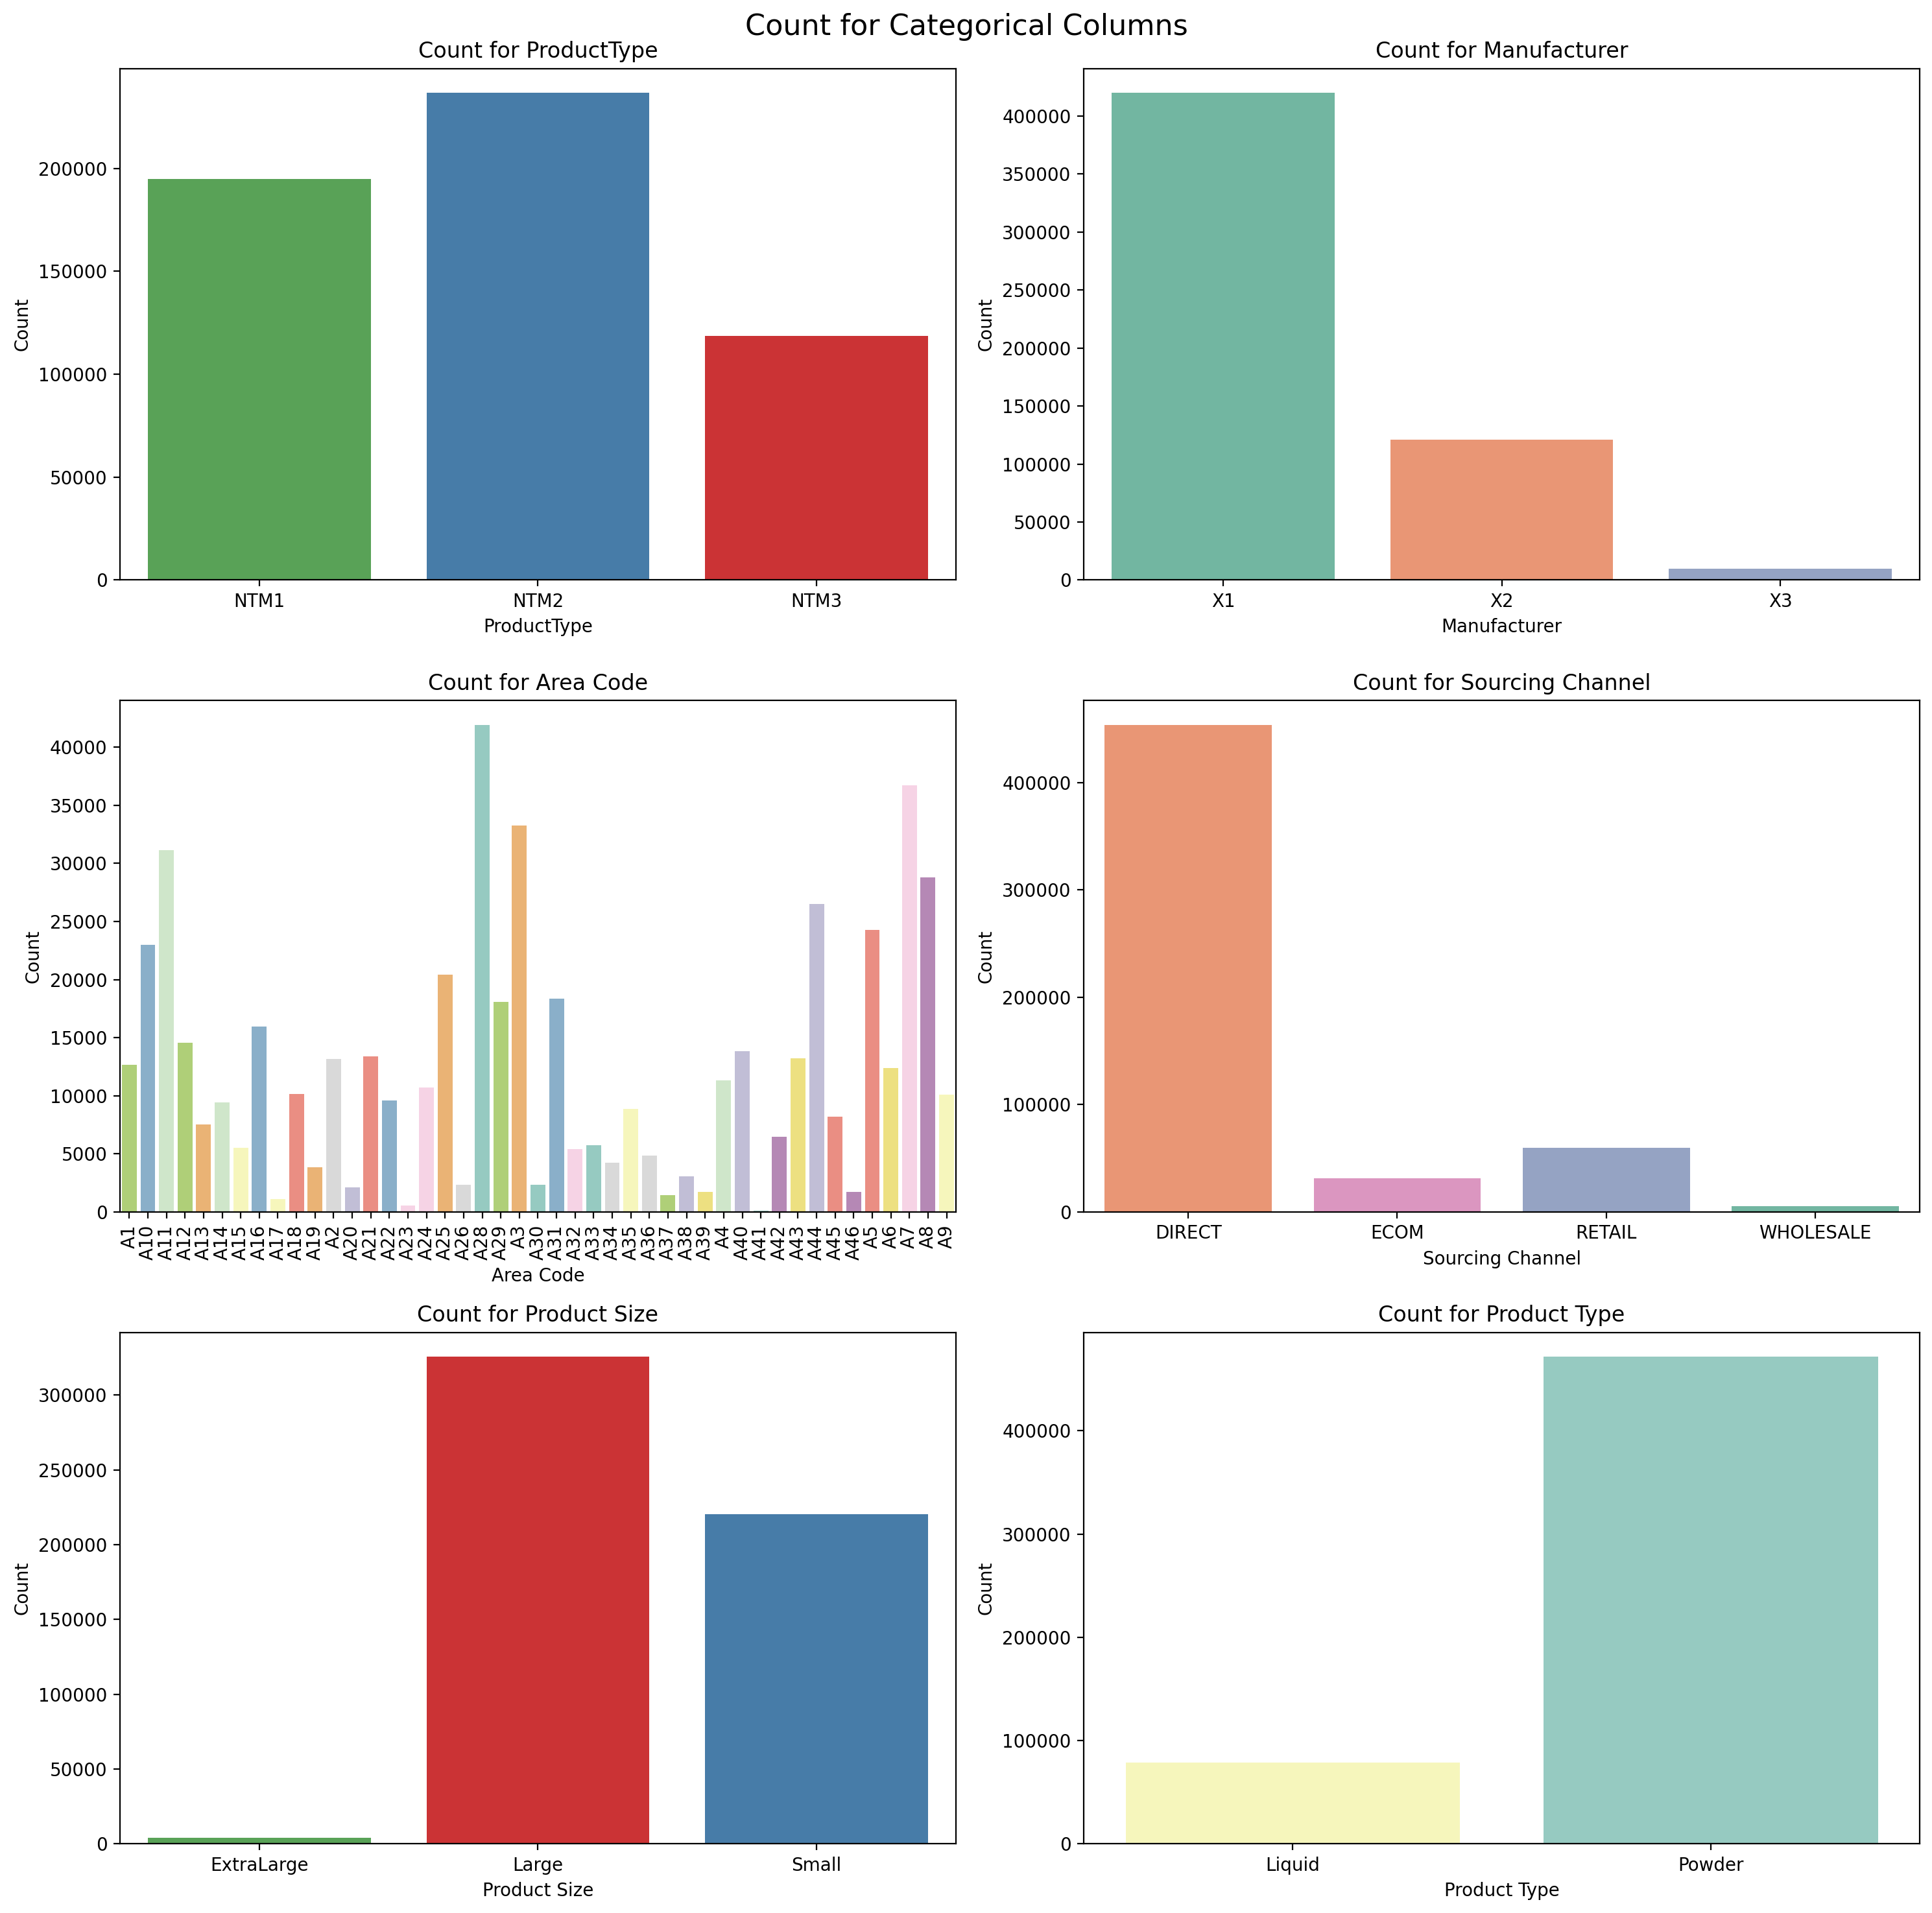

In [134]:
# color palettes for each category
color_palettes = {
    'ProductType': 'Set1',
    'Manufacturer': 'Set2',
    'Area Code': 'Set3',
    'Sourcing Channel': 'Set2',
    'Product Size': 'Set1',
    'Product Type': 'Set3'
}
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type']
# Sorting the unique values for every column
sorted_values = {col: train_data[col].value_counts().index.sort_values() for col in categorical_columns}

# Creation of subplots for categorical column
fig, axes = plt.subplots(3, 2, figsize=(15, 15),dpi=200)
fig.suptitle("Count for Categorical Columns", fontsize=16)

# Loop through each categorical column
for i, col in enumerate(categorical_columns):
    # Calculate the row and column indices
    row_index = i // 2
    col_index = i % 2

    # Countplot for every category
    sns.countplot(x=col, data=train_data, order=sorted_values[col], palette=color_palettes[col], ax=axes[row_index, col_index], hue=col)

    # Rotate x-axis labels only for 'Area Code' as its getting cluttered on the x-axis
    if col == 'Area Code':
        axes[row_index, col_index].tick_params(axis='x', labelrotation=90)

    axes[row_index, col_index].set_title(f"Count for {col}")
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


***Interpretation*** -

- ProductType - The product type NTM2 has the highest count in the dataset followed by NTM1 and NTM3.
- Manufacturer - X1 manufactures most of the products, followed by X2 and X3.
- Area Code - A28 has the highest number of sourcings
- Sourcing Channel - The most frequent used sourcing channel is DIRECT
- Product Size - The most sourced product size is Large
- Product Type - Powdered products have the highest count in the dataset

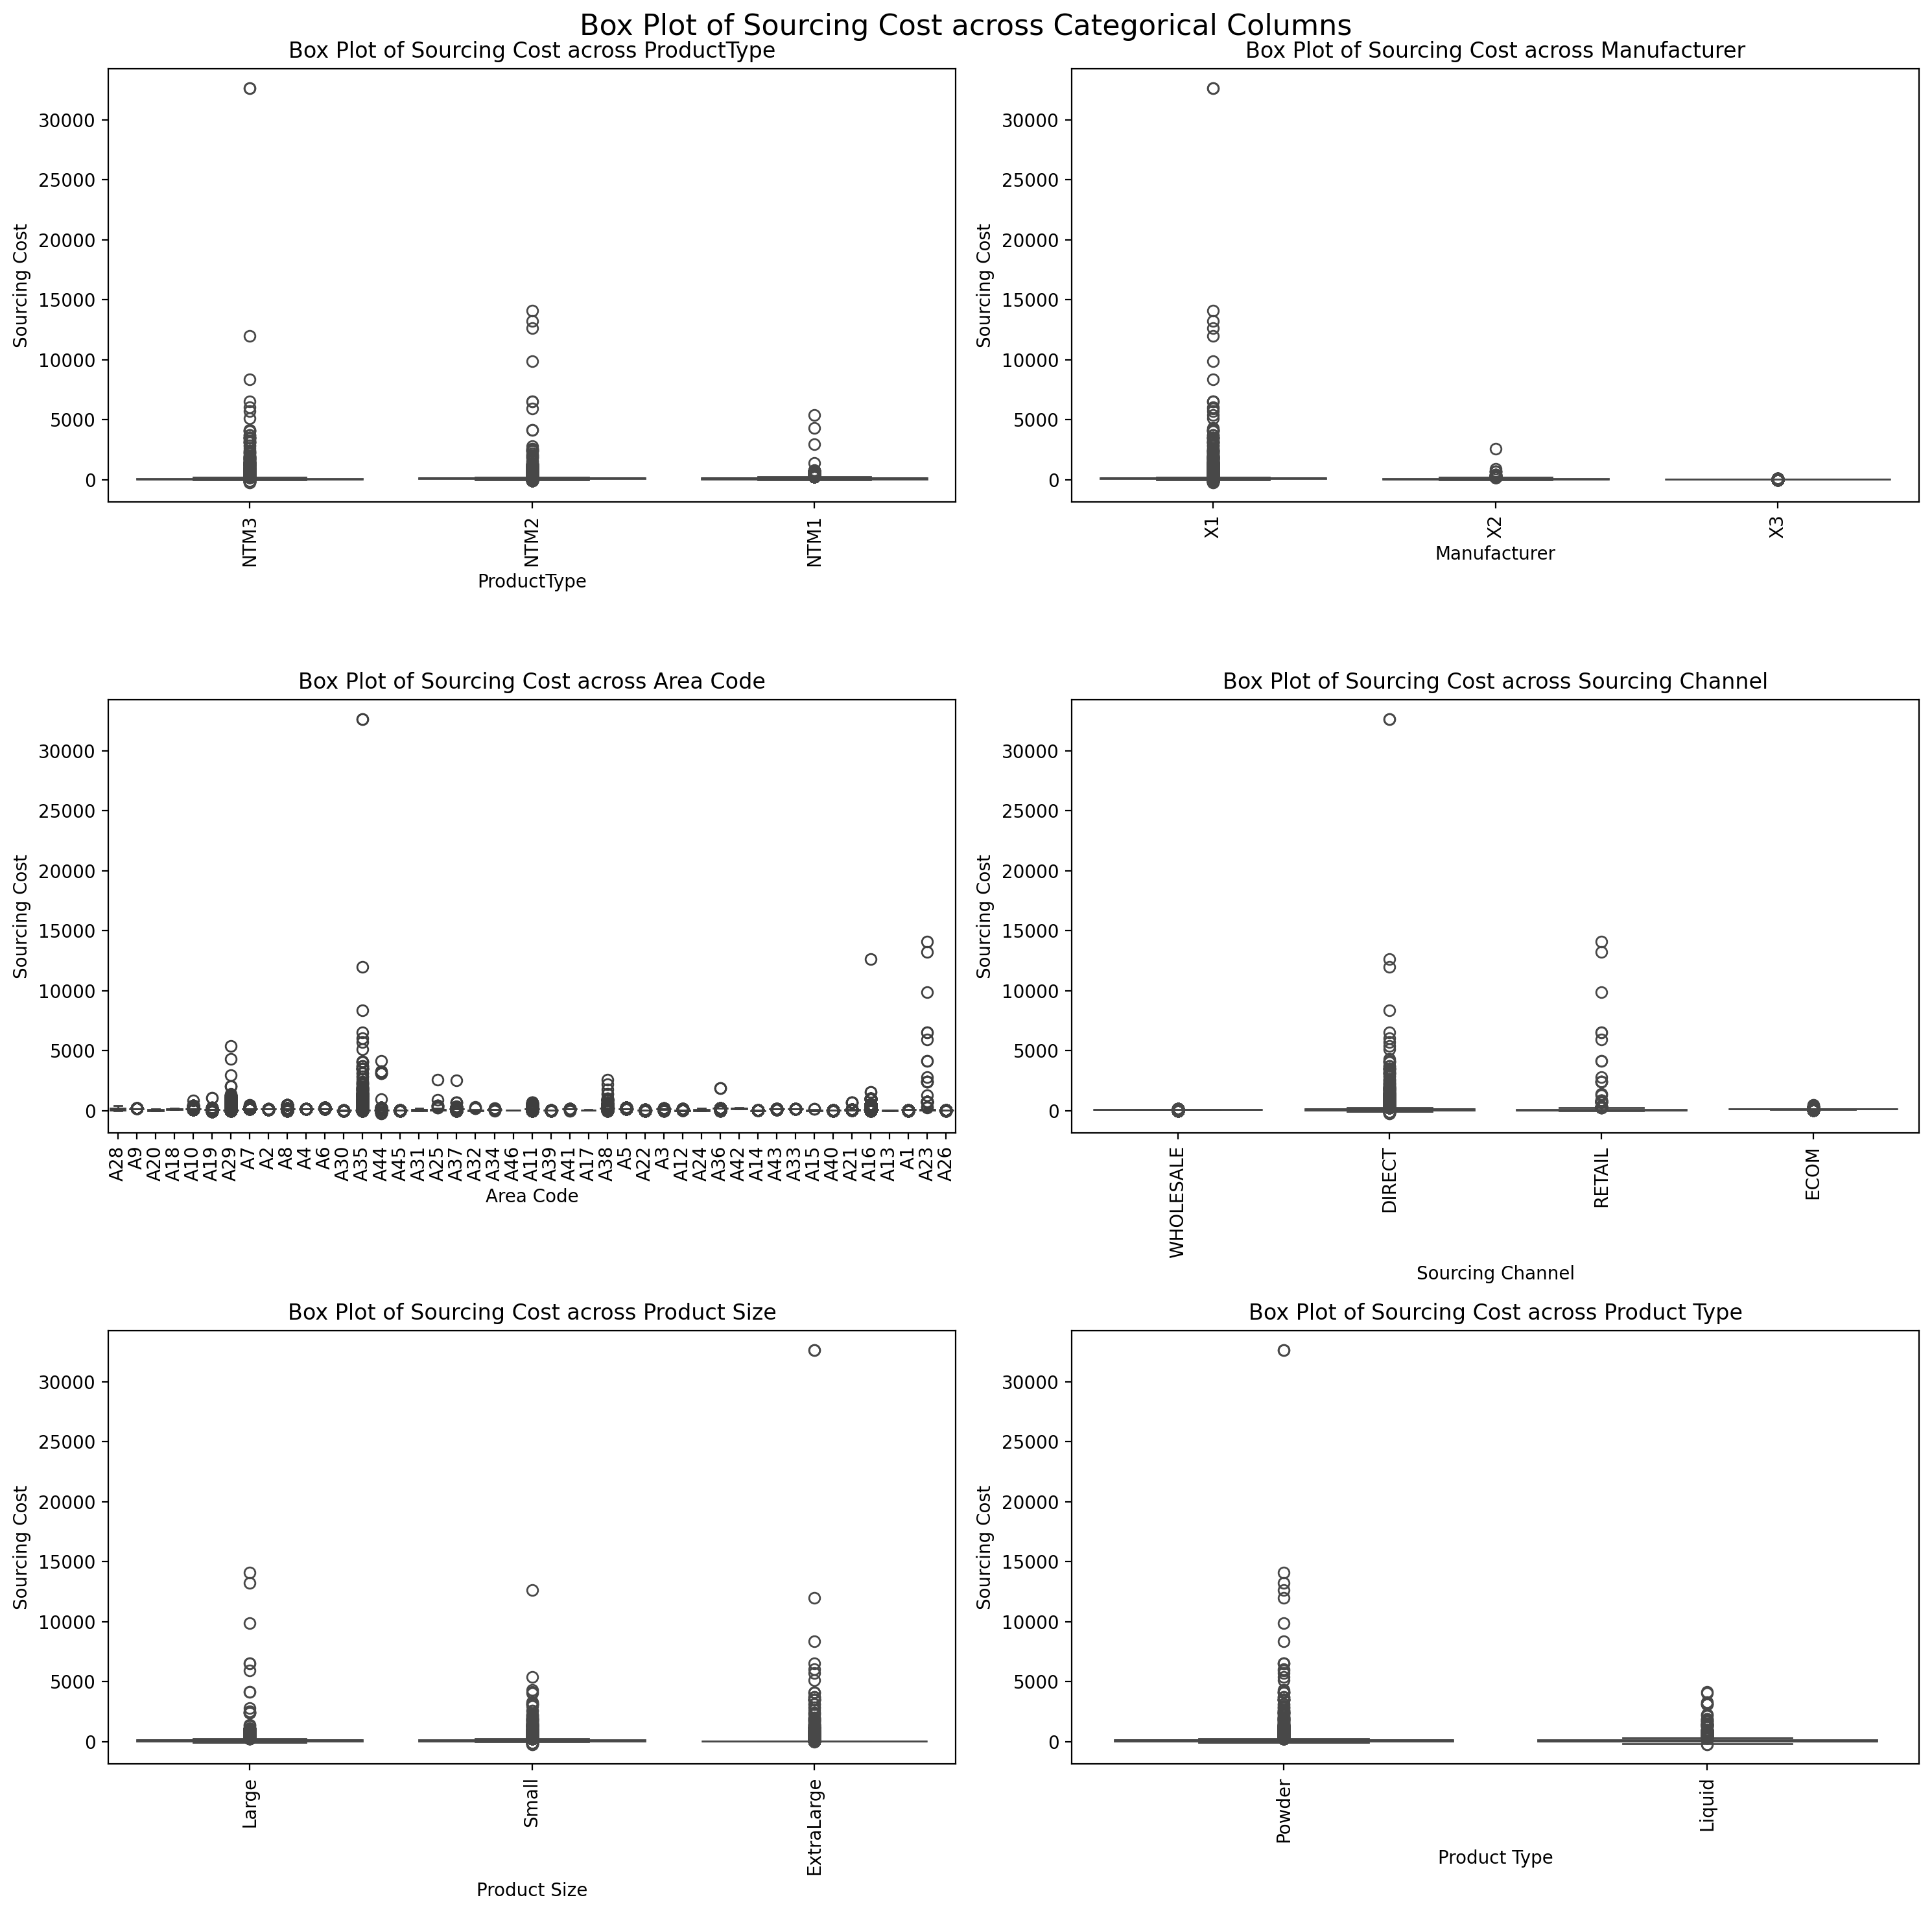

In [137]:
#subplots for box plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15),dpi=200)
fig.suptitle("Box Plot of Sourcing Cost across Categorical Columns", fontsize=16)

for i, column in enumerate(categorical_columns):
    row_index = i // 2
    col_index = i % 2

    sns.boxplot(x=column, y='Sourcing Cost', data=train_data, ax=axes[row_index, col_index],palette='Set1',hue=column)
    axes[row_index, col_index].tick_params(axis='x', labelrotation=90)

    axes[row_index, col_index].set_title(f"Box Plot of Sourcing Cost across {column}")
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel("Sourcing Cost")

plt.tight_layout()
plt.show()


***Interpretaion*** -
The box plots of the various categories show the presence of a number of outliers in the data which need to be taken care of.

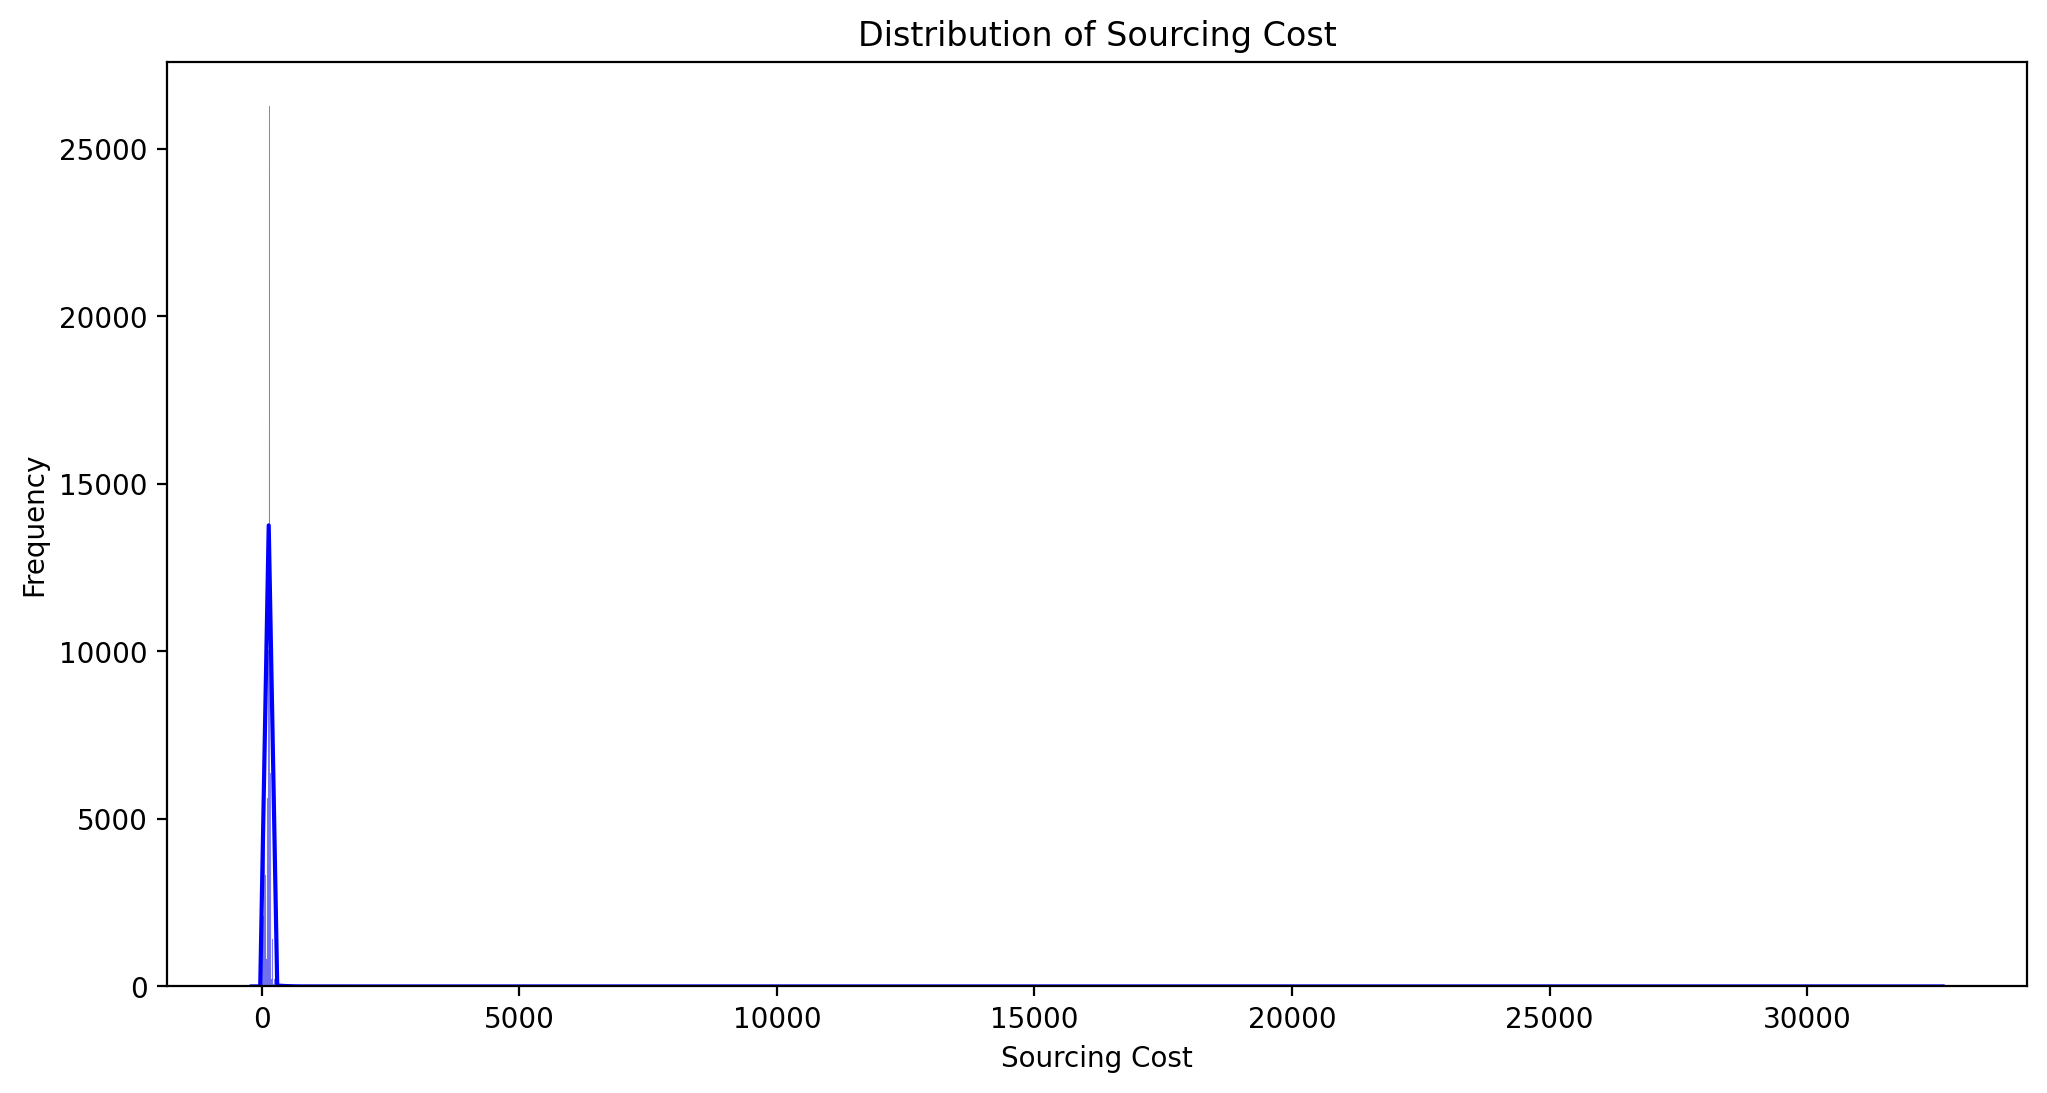

In [ ]:
# Create a distribution plot for 'Sourcing Cost'
plt.figure(figsize=(12, 6),dpi=200)
sns.histplot(train_data['Sourcing Cost'], kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

Interpretation - The above plot shows that the data is highly skewed with a number of outliers present in it.

# Multivariate Analysis

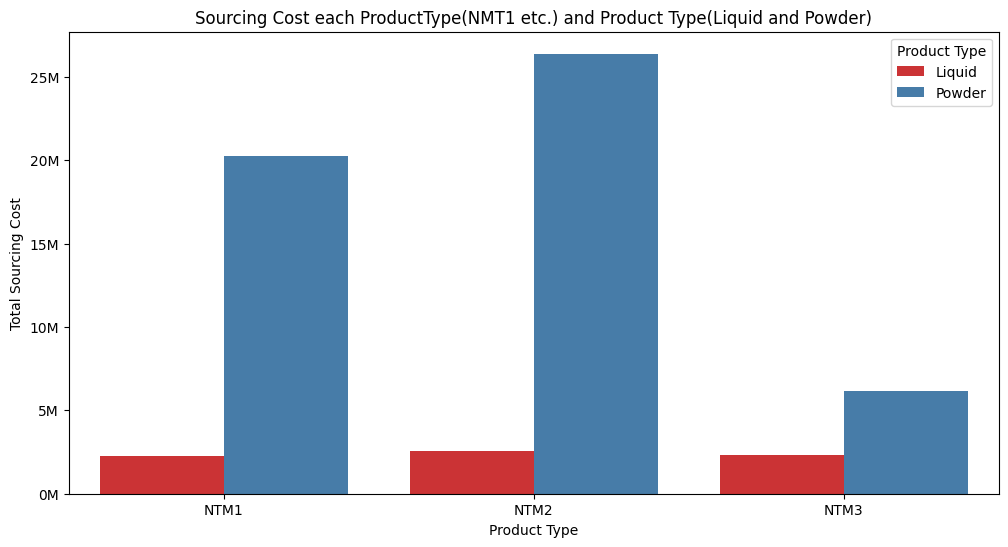

In [ ]:
# Your existing code to group data and create a plot
product_sales = train_data.groupby(['ProductType', 'Product Type'])['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=product_sales, x='ProductType', y='Sourcing Cost', hue='Product Type', palette='Set1')

# Setting custom formatter
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlabel('Product Type')
plt.ylabel('Total Sourcing Cost')
plt.title('Sourcing Cost each ProductType(NMT1 etc.) and Product Type(Liquid and Powder)')
plt.legend(title='Product Type')
plt.show()

***Interpretation*** -

In all the product types (NMT1, NMT2, NMT3) Liquid is the most sourced product type than powder



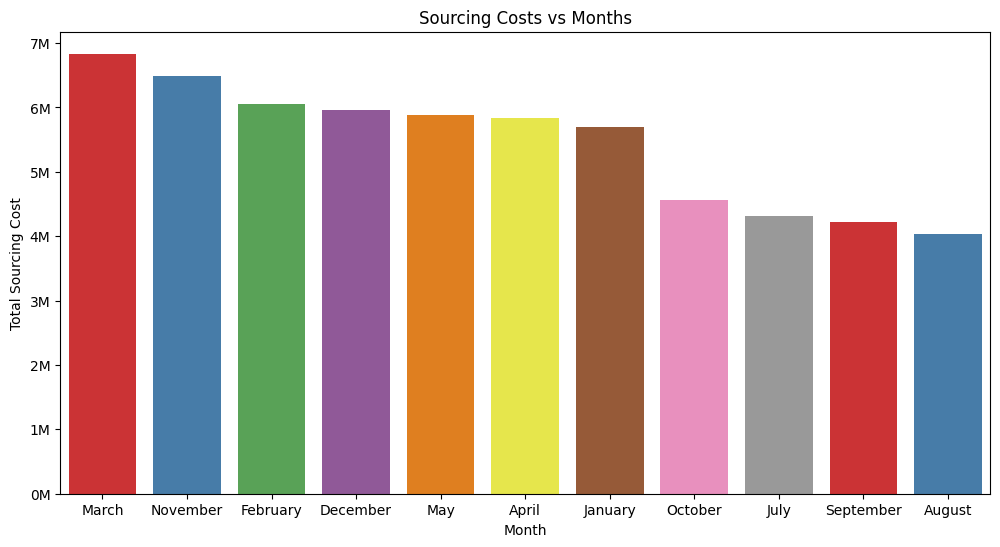

In [ ]:
# Sales each month
monthly_sales = train_data.groupby(train_data['Month of Sourcing'].dt.month)['Sourcing Cost'].sum().reset_index()
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month of Sourcing'], format='%m').dt.month_name()

# Sort the DataFrame by 'Sourcing Cost' in descending order
monthly_sales = monthly_sales.sort_values(by='Sourcing Cost', ascending=False)

plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=monthly_sales, x='Month', y='Sourcing Cost', order=monthly_sales['Month'], palette='Set1', hue='Month')
plt.xlabel('Month')
plt.ylabel('Total Sourcing Cost')
plt.title('Sourcing Costs vs Months')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


***Interpretation*** -

Among all the 11 months sourcing cost was the higest in the month of March


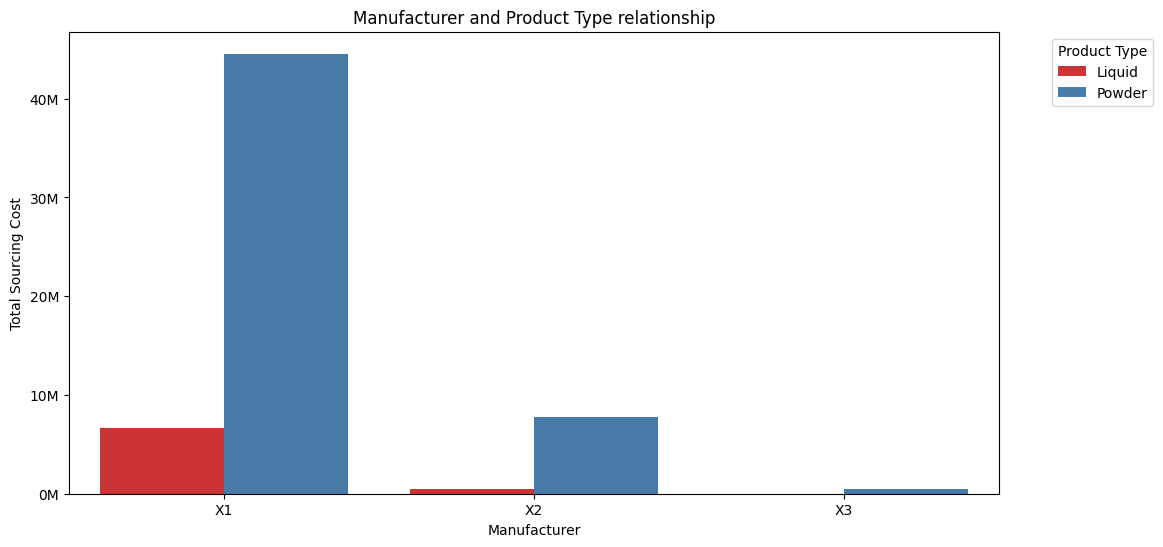

In [ ]:
# Manufacturer and Product Type relationship
manufacturer_product_sales = train_data.groupby(['Manufacturer', 'Product Type'])['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=manufacturer_product_sales, x='Manufacturer', y='Sourcing Cost', hue='Product Type', palette='Set1')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sourcing Cost')
plt.title('Manufacturer and Product Type relationship')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


***Interpretation*** -

From the above plot it can be seen that the manufacturer X1 produces the most items of both the prodcut types liquid and powder followd by X2 and X3

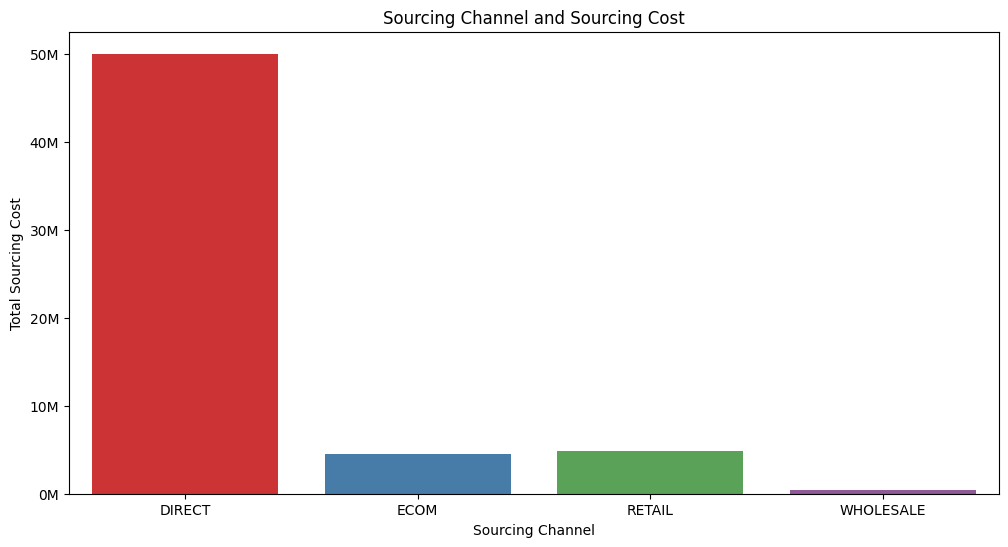

In [ ]:
# Sourcing Channel and Sourcing Cost
sourcing_channel_sales = train_data.groupby('Sourcing Channel')['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=sourcing_channel_sales, x='Sourcing Channel', y='Sourcing Cost', palette='Set1', hue='Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Total Sourcing Cost')
plt.title('Sourcing Channel and Sourcing Cost')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


***Interpretation*** -

From the above plot it can be seen Direct sourcing channel has the highest Sourcing amount followed by Ecom, Retail and then wholesale

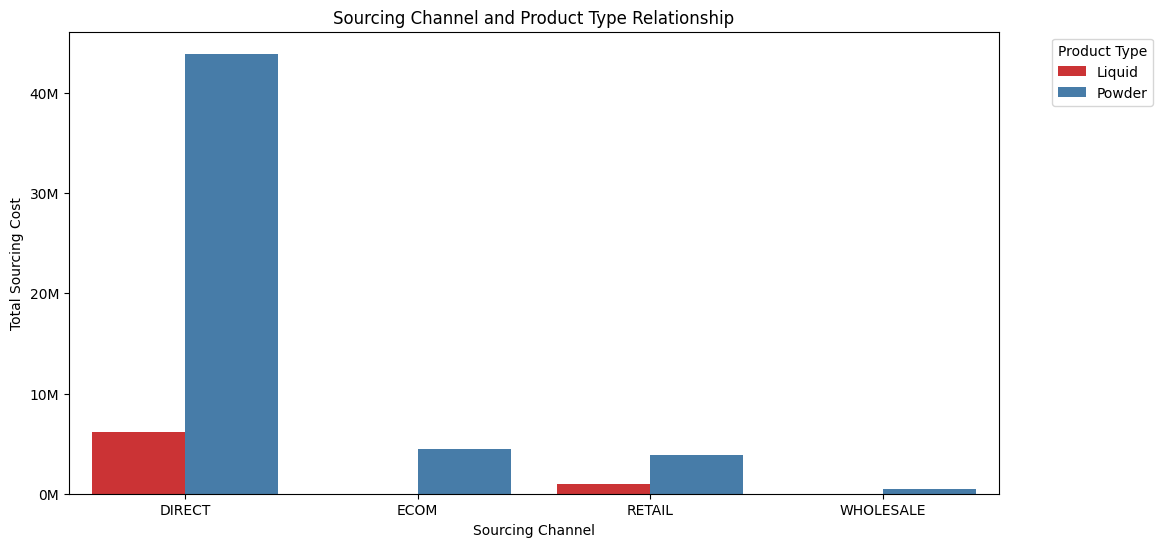

In [140]:
# Sourcing Channel and Product Type Relationship
sourcing_channel_product_type = train_data.groupby(['Sourcing Channel', 'Product Type'])['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=sourcing_channel_product_type, x='Sourcing Channel', y='Sourcing Cost', hue='Product Type', palette='Set1')
plt.xlabel('Sourcing Channel')
plt.ylabel('Total Sourcing Cost')
plt.title('Sourcing Channel and Product Type Relationship')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

***Interpretation*** -

The above plot shows that the direct channel and retail soruces both the product types, while the ECOM and WHOLESLAE channel sources only the powder prodcut type.

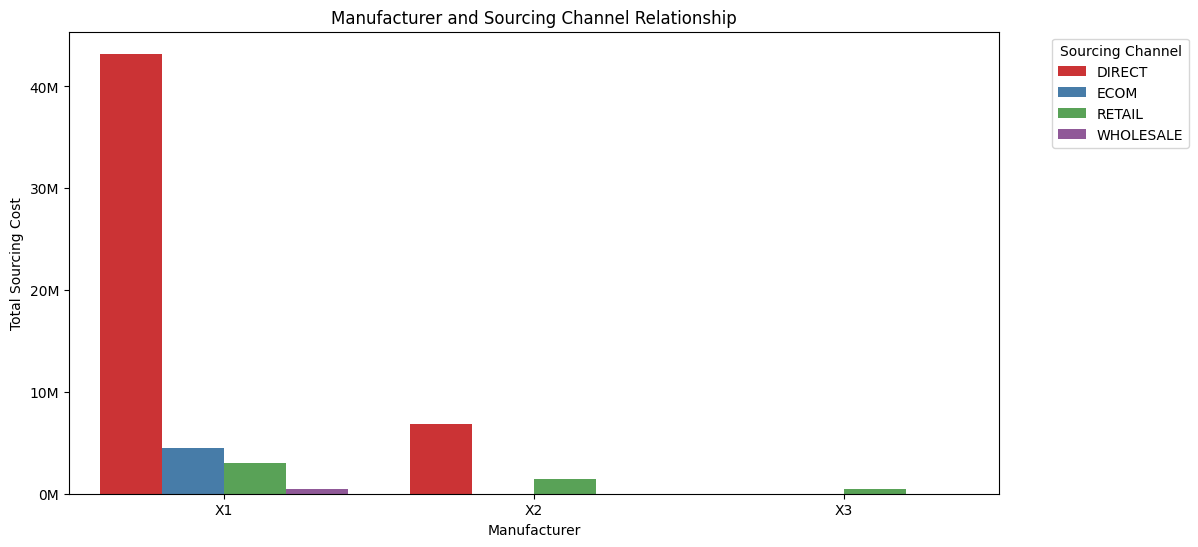

In [141]:
# Manufacturer and Sourcing Channel Relationship
manufacturer_sourcing_channel = train_data.groupby(['Manufacturer', 'Sourcing Channel'])['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=manufacturer_sourcing_channel, x='Manufacturer', y='Sourcing Cost', hue='Sourcing Channel', palette='Set1')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sourcing Cost')
plt.title('Manufacturer and Sourcing Channel Relationship')
plt.legend(title='Sourcing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

***Interpretation*** -

The above plot shows that the manufacturer X1 works in all the sourcing channels but X2 works only in DIRECT anf RETAIL and X3 only in RETAIL.

# Exploring the negative Sourcing Cost values
This section explores about the negative sourcing cost values

In [ ]:
# Filtering the data for negative sourcing costs
negative_sourcing_cost = train_data[train_data['Sourcing Cost'] < 0]

In [ ]:
print(f"Number of negative Sourcing Costs - {len(negative_sourcing_cost)}")

Number of negative Sourcing Costs - 2231


<ipython-input-39-7a3925c8225f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(negative_sourcing_cost['Sourcing Cost'], bins=10, kde=False,palette='Set1')


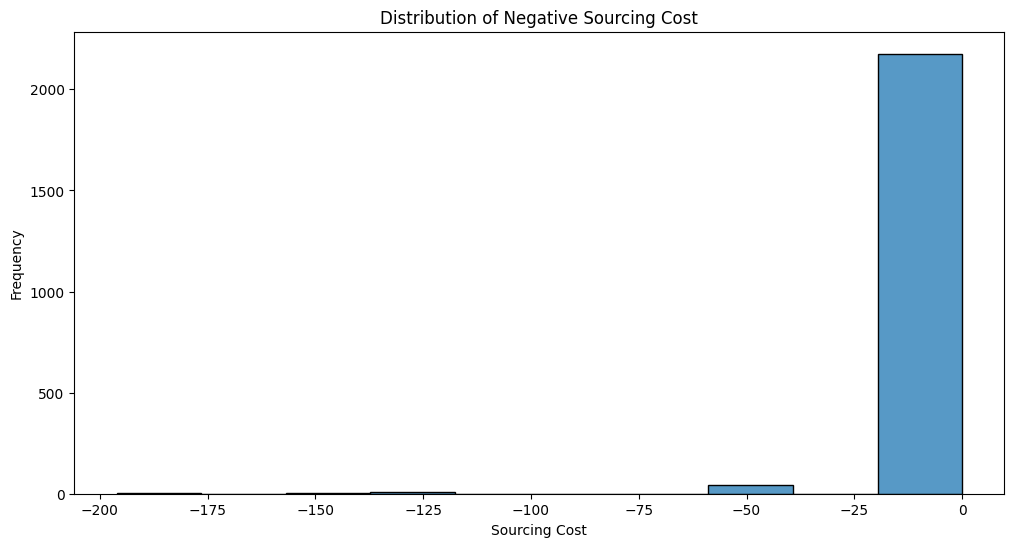

In [ ]:
#Histogram
plt.figure(figsize=(12, 6),dpi=100)
sns.histplot(negative_sourcing_cost['Sourcing Cost'], bins=10, kde=False,palette='Set1')
plt.title('Distribution of Negative Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

***Interpretation***-
- From the above plot it can be seen that most negative values are in the range -25 to 0. We can remove the these values as the number is 2231 which forms a very small part of the dataset

- Another approach could be that we can replace them with the absolute values, if we consider that there has been an error in entering of the data

# Outlier Detection and Handling
- We can either go for trimming of outlier (removing them)
- Second approach could be to clip them to the lower and the upper bound

### 1st approach - Trimming of the outliers

In [ ]:
# Calculate the first quartile (Q1)
Q1 = train_data['Sourcing Cost'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = train_data['Sourcing Cost'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train_data[(train_data['Sourcing Cost'] < lower_bound) | (train_data['Sourcing Cost'] > upper_bound)]

# Number of outliers
num_outliers = outliers.shape[0]
print("Number of outliers using IQR method:", num_outliers)

Number of outliers using IQR method: 2666


In [ ]:
# Removing outliers
outlier_removed_data = train_data[(train_data['Sourcing Cost'] >= lower_bound) & (train_data['Sourcing Cost'] <= upper_bound)]

# Check the shape of the cleaned dataframe
print("Shape of cleaned dataframe:", outlier_removed_data.shape)


Shape of cleaned dataframe: (547510, 8)


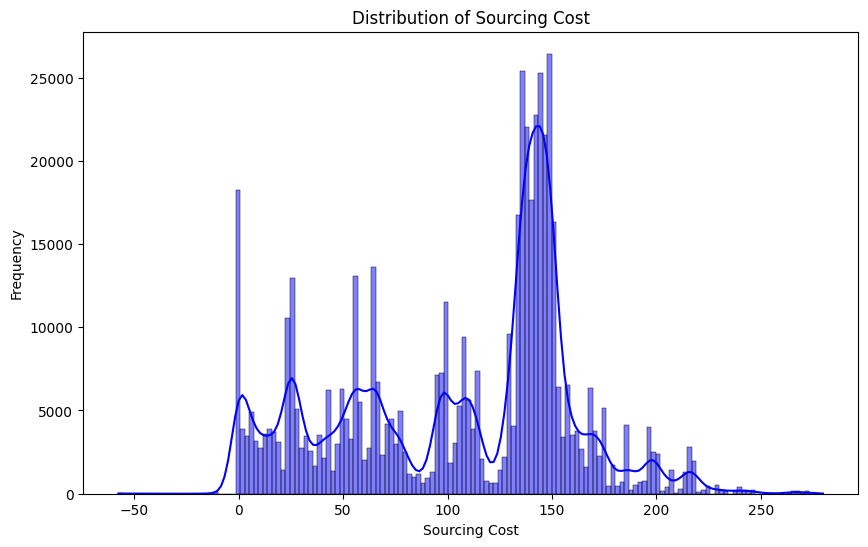

In [ ]:
# Create a distribution plot for 'Sourcing Cost'
plt.figure(figsize=(10, 6))
sns.histplot(outlier_removed_data['Sourcing Cost'], kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

#### Removing the rows with negative_values

In [ ]:
train_data_with_outliers_removed = outlier_removed_data.copy()

In [ ]:
train_data_with_outlier_removed_neg_rem = train_data_with_outliers_removed[train_data_with_outliers_removed['Sourcing Cost'] > 0]
train_data_with_outlier_removed_neg_rem.shape

(535209, 8)

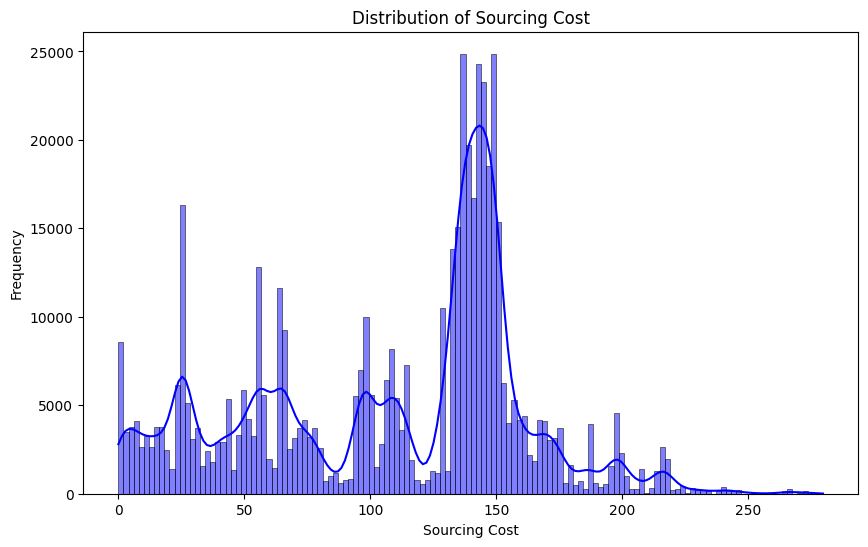

In [ ]:
# Create a distribution plot for 'Sourcing Cost'
plt.figure(figsize=(10, 6))
sns.histplot(train_data_with_outlier_removed_neg_rem['Sourcing Cost'], kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train_data_with_outlier_removed_neg_rem.to_csv("train_data_with_outlier_removed_neg_rem.csv")

#### Making the negative values absolute

In [ ]:
train_data_with_outlier_removed_abs = train_data_with_outliers_removed.copy()
train_data_with_outlier_removed_abs['Sourcing Cost'] = train_data_with_outlier_removed_abs['Sourcing Cost'].abs()

In [ ]:
train_data_with_outlier_removed_abs.to_csv("train_data_with_outlier_removed_abs.csv")

### 2nd Approach - Clipping the outliers

In [ ]:
train_data_with_outlier_clipping = train_data.copy()
train_data_with_outlier_clipping['Sourcing Cost'] = np.where(
    train_data_with_outlier_clipping['Sourcing Cost'] > upper_bound ,
    upper_bound,
    np.where(
        train_data_with_outlier_clipping['Sourcing Cost'] < lower_bound,
        lower_bound,
        train_data_with_outlier_clipping['Sourcing Cost']
    )
)

In [ ]:
#The first quartile (Q1)
Q1 = train_data_with_outlier_clipping['Sourcing Cost'].quantile(0.25)
#The third quartile (Q3)
Q3 = train_data_with_outlier_clipping['Sourcing Cost'].quantile(0.75)
# interquartile range (IQR)
IQR = Q3 - Q1
#lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = train_data_with_outlier_clipping[(train_data_with_outlier_clipping['Sourcing Cost'] < lower_bound) | (train_data_with_outlier_clipping['Sourcing Cost'] > upper_bound)]
# Number of outliers
num_outliers = outliers.shape[0]
print("Number of outliers using IQR method:", num_outliers)
## We can see that now there are no outliers

Number of outliers using IQR method: 0


In [ ]:
# Number of negative sourcing values
len(train_data_with_outlier_clipping[train_data_with_outlier_clipping['Sourcing Cost'] < 0])

2231

#### Removing the rows with *negative_values*

In [ ]:
train_data_with_outlier_clipping_neg_rem = train_data_with_outlier_clipping[train_data_with_outlier_clipping['Sourcing Cost'] > 0]
train_data_with_outlier_clipping_neg_rem.shape

(537861, 8)

In [ ]:
train_data_with_outlier_clipping_neg_rem.to_csv("train_data_with_outlier_clipping_neg_rem.csv")

#### Making the negative values absolute

In [ ]:
train_data_with_outlier_clipping_abs = train_data_with_outlier_clipping.copy()
train_data_with_outlier_clipping_abs['Sourcing Cost'] = train_data_with_outlier_clipping_abs['Sourcing Cost'].abs()

In [ ]:
# Number of negative values after making absolute
len(train_data_with_outlier_clipping_abs[train_data_with_outlier_clipping_abs['Sourcing Cost'] < 0])

0

In [ ]:
train_data_with_outlier_clipping_abs.to_csv("train_data_with_outlier_clipping_abs.csv")

In [ ]:
train_data_with_outlier_clipping_abs.shape

(550176, 8)

# Checking for correlation and association

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# List of categorical columns
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
                       'Product Size', 'Product Type', 'Month of Sourcing']

numerical_variable = 'Sourcing Cost'

# dictionary to store Kruskal-Wallis results
kruskal_results = {}

for col in categorical_columns:
    groups = [group[numerical_variable].dropna() for name, group in train_data_with_outlier_removed_neg_rem.groupby(col)]
    if len(groups) > 1:
        statistic, p_val = kruskal(*groups)
        kruskal_results[col] = (statistic, p_val)

# Results
for col, (statistic, p_val) in kruskal_results.items():
    print(f"Kruskal-Wallis result for {col}: H-statistic = {statistic}, p-value = {p_val}")


Kruskal-Wallis result for ProductType: H-statistic = 69341.55687708248, p-value = 0.0
Kruskal-Wallis result for Manufacturer: H-statistic = 76054.46003473306, p-value = 0.0
Kruskal-Wallis result for Area Code: H-statistic = 369885.04617334163, p-value = 0.0
Kruskal-Wallis result for Sourcing Channel: H-statistic = 35953.55509659483, p-value = 0.0
Kruskal-Wallis result for Product Size: H-statistic = 2955.3955060104404, p-value = 0.0
Kruskal-Wallis result for Product Type: H-statistic = 3507.222264483043, p-value = 0.0
Kruskal-Wallis result for Month of Sourcing: H-statistic = 22249.951532613883, p-value = 0.0


 ***Interpretation*** -  These results show that there is association between the categorical and the numeric (Sourcing Cost) features as the p-value is much lower than 0.05

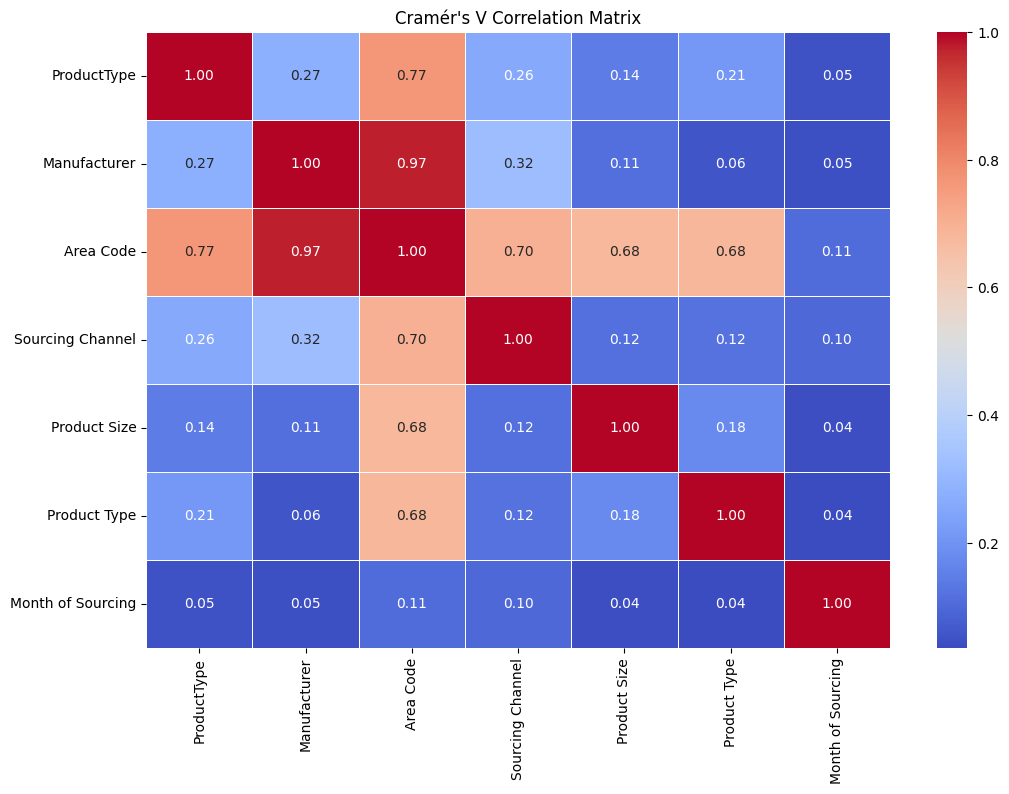

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(train_data[col1], train_data[col2])


plt.figure(figsize=(12, 8),dpi=100)
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cramér's V Correlation Matrix")
plt.show()


 ***Interpretation*** -  From the heatmap we can see that the feature Area Code is highly correlated with other features which is an indication of multicollinearity being present. I considered to remove it to ensure mutlicollinearlity is reduced.

# Model Training

# 1st Approach

In [ ]:
# Function for training the models

def train_model(model, X, y):
  '''
  This is utility function that takes the instance of the model and fits the model on the data and gives the requiered scores

  model : Instance of the mode
  X : The independent feature set
  y : The dependent variable

  '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the number of folds for cross-validation
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform k-fold cross-validation with RMSE as the scoring metric
    rmse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')

    # Convert negative RMSE scores to positive and take the mean
    mean_rmse = np.mean(-rmse_scores)

    print("Mean RMSE for {}-fold cross-validation: {:.2f}".format(num_folds, mean_rmse))

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_test)

    # Calculate MSE, MAE, and R^2 score
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)

    return model

In [139]:
def plot_data(x,y,x_label,y_label):
  '''
  Utility funciton for plotting the Original Sourcing cost value and the sourcing cost values predicted by the model

  Parameters :
  x : Quantity on the x-axis
  y : Quantity on the y-axis
  x_label : Label for the x-axis
  y_label : Label for the y-axis
  '''
  plt.figure(figsize=(10, 6))
  plt.plot(x, label=x_label, marker='o')
  plt.plot(y, label=y_label, marker='x')
  plt.xlabel('Index')
  plt.ylabel('Value')
  plt.title(f'{x_label} vs {y_label}')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_features(data, categorical_columns, encoder=None):
    """
    Encode categorical features using one-hot encoding.

    Parameters:
    - data: DataFrame, the dataset containing categorical features and 'Sourcing Cost' column.
    - categorical_columns: list, names of the categorical columns.
    - encoder: OneHotEncoder, the encoder object (optional, default=None).

    Returns:
    - encoded_data: DataFrame, the dataset with categorical features encoded.
    - encoder: OneHotEncoder, the fitted encoder object.
    """
    if encoder is None:
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(data[categorical_columns])

    encoded_array = encoder.transform(data[categorical_columns])
    encoded_data = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

    return encoded_data, encoder

# Not taking the Area Code and Month of Sourcing columns
categorical_columns = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
encoded_data1, encoder = encode_categorical_features(train_data_with_outlier_removed_neg_rem, categorical_columns)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Training on data with outliers removed and negative `Sourcing Cost` values removed.

In [ ]:
# Splitting the data into features (X) and target variable (y)
X = encoded_data1
y = train_data_with_outlier_removed_neg_rem['Sourcing Cost']

# Splitting the data into training and validation sets (80% training, 20% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Applying the linear regression model
linear_regressor = LinearRegression()
linear_regressor = train_model(linear_regressor, X, y)

Mean RMSE for 5-fold cross-validation: 42.78
Mean Squared Error (MSE): 1831.6071060840436
Root Mean Squared Error (RMSE): 42.79727919020137
Mean Absolute Error (MAE): 31.365054624586605
R^2 Score: 0.3743362430917275


In [ ]:
# Applying the random forest model. This rf_regressor1 name is specifically used as there are more models trained ahead so as to
# be able to differentiate properly
rf_regressor1 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor1 = train_model(rf_regressor1,X,y)

Mean RMSE for 5-fold cross-validation: 35.94
Mean Squared Error (MSE): 1286.7941707358862
Root Mean Squared Error (RMSE): 35.87191339663785
Mean Absolute Error (MAE): 24.391647960623132
R^2 Score: 0.5604404063753741


In [ ]:
# Make predictions on the preprocessed test data using the trained model
test_data_encoded, encoder = encode_categorical_features(test_data, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# For linear regression
y_pred_lr = linear_regressor.predict(test_data_encoded)
test_data['linear_regression'] = y_pred_lr

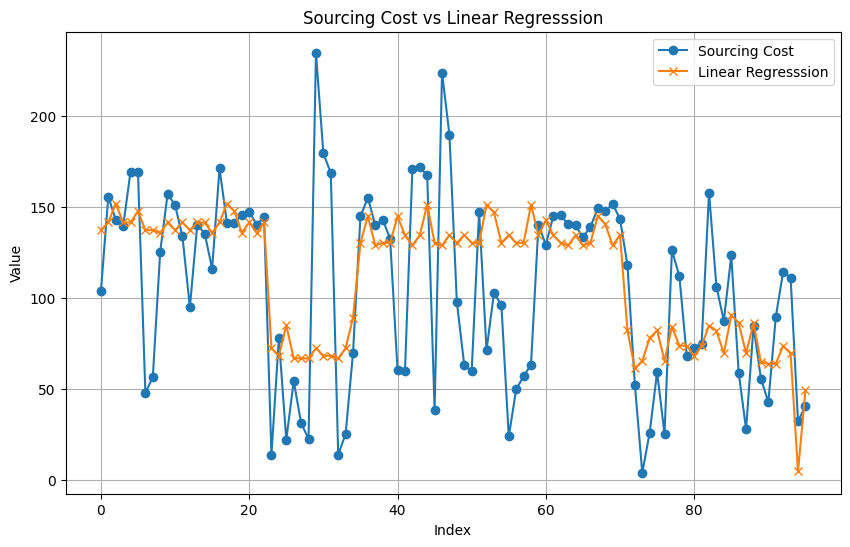

In [ ]:
sourcing_cost = test_data['Sourcing Cost']
predicted_rf = test_data['linear_regression']

plot_data(sourcing_cost,predicted_rf,'Sourcing Cost','Linear Regresssion')

From the above plot of orignial data and the predicted data from the linear regression model it can be seen that the linear regression model could not capture the relationship of the original data and its underfitting completely

In [132]:
# Calculating the RMSE and r2_score on test data
print(f"Rmse on test data for Linear Regressor is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_lr ))}")
print(f"R2 score on test data for Linear Regressor  is : {r2_score(test_data['Sourcing Cost'], y_pred_lr )}")

Rmse on test data for Linear Regressor is : 46.31211157031822
R2 score on test data for Linear Regressor  is : 0.20941953164850102


In [ ]:
y_pred_rg1 = rf_regressor1.predict(test_data_encoded)
# Storing for finding out the difference between the original values of sourcing cost in test data and the predicted values
test_data['rf_regressor1'] = y_pred_rg1

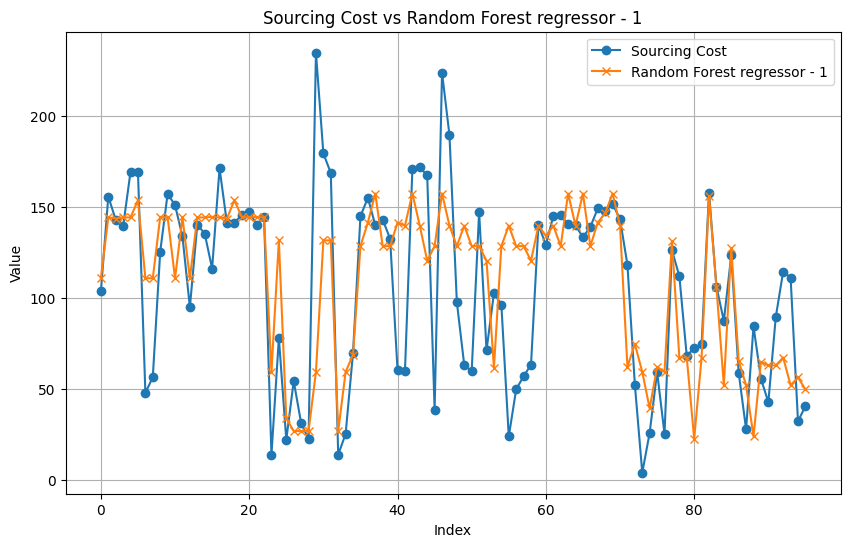

In [ ]:
sourcing_cost = test_data['Sourcing Cost']
predicted_rf = test_data['rf_regressor1']

plot_data(sourcing_cost,predicted_rf,'Sourcing Cost','Random Forest regressor - 1')

In [ ]:
# Applying the Xg-Boost Regressor
xgb_regressor1 = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_regressor1  = train_model(xgb_regressor1,X,y)

Mean RMSE for 5-fold cross-validation: 35.94
Mean Squared Error (MSE): 1286.7917603606481
Root Mean Squared Error (RMSE): 35.87187979965154
Mean Absolute Error (MAE): 24.390654407794656
R^2 Score: 0.560441229742144


In [ ]:
y_pred_xg1 = xgb_regressor1.predict(test_data_encoded)
test_data['xg_regressor1'] = y_pred_xg1

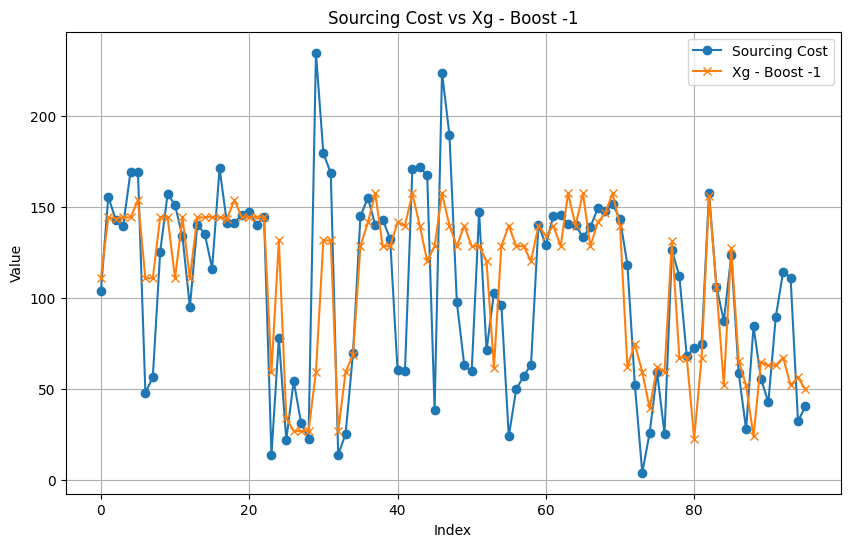

In [ ]:
sourcing_cost = test_data['Sourcing Cost']
predicted_xg1 = test_data['xg_regressor1']

plot_data(sourcing_cost,predicted_xg1,'Sourcing Cost','Xg - Boost -1')

In [ ]:
print(f"Rmse on test data for random forest regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_rg1 ))}")
print(f"R2 score on test data for random forest regressor 2 is : {r2_score(test_data['Sourcing Cost'], y_pred_rg1 )}")
print(f"Rmse on test data for Xg boost regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_xg1 ))}")
print(f"R2 score on test data for Xg boost regressor 1 is : {r2_score(test_data['Sourcing Cost'], y_pred_xg1 )}")

Rmse on test data for random forest regressor 1 is : 40.6068344703704
R2 score on test data for random forest regressor 2 is : 0.39220771185134407
Rmse on test data for Xg boost regressor 1 is : 40.60173124644163
R2 score on test data for Xg boost regressor 1 is : 0.39236046964630633


### Training on data with outliers removed and negative Sourcing Cost values transformed to absolute values.

In [ ]:
# Preparing the data for inputting into the model - encoding all the categorical features exluding Area Code and Month of Sourcing
categorical_columns = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
encoded_data2, encoder = encode_categorical_features(train_data_with_outlier_removed_abs, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
# Split the data into features (X) and target variable (y)
X1 = encoded_data2
y1 = train_data_with_outlier_removed_abs['Sourcing Cost']

Random Forest

In [ ]:
rf_regressor2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor2 = train_model(rf_regressor2,X1,y1)

Mean RMSE for 5-fold cross-validation: 36.63
Mean Squared Error (MSE): 1317.4844019393227
Root Mean Squared Error (RMSE): 36.297167960315065
Mean Absolute Error (MAE): 24.696777409464687
R^2 Score: 0.5738932890313126


In [ ]:
y_pred_rg2 = rf_regressor2.predict(test_data_encoded)
test_data['rf_regressor2'] = y_pred_rg2

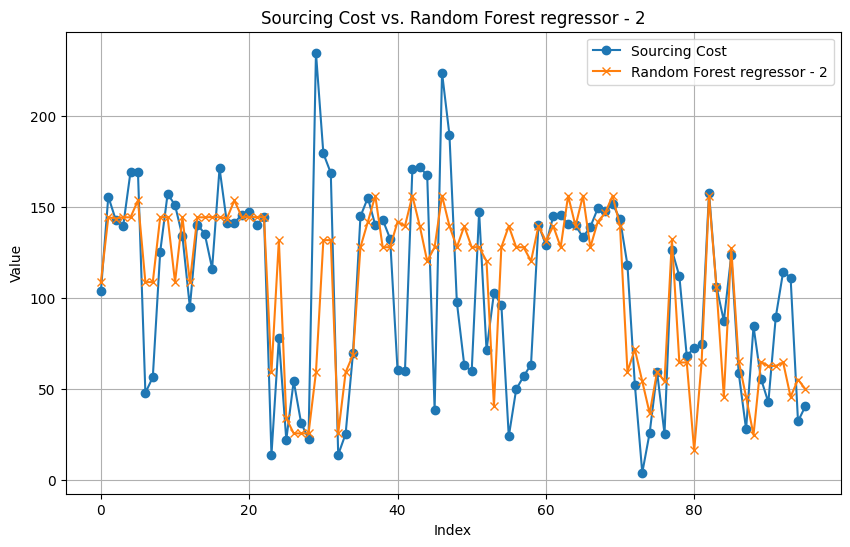

In [ ]:
sourcing_cost = test_data['Sourcing Cost']
predicted_rf2 = test_data['rf_regressor2']

plot_data(sourcing_cost,predicted_rf2,'Sourcing Cost','andom Forest regressor - 2')

Xg Boost

In [ ]:
xgb_regressor2 = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_regressor2  = train_model(xgb_regressor2,X1,y1)

Mean RMSE for 5-fold cross-validation: 36.63
Mean Squared Error (MSE): 1317.4920918273306
Root Mean Squared Error (RMSE): 36.297273889747295
Mean Absolute Error (MAE): 24.697990526804976
R^2 Score: 0.5738908019332628


In [ ]:
y_pred_xgb2 = xgb_regressor2.predict(test_data_encoded)
test_data['xgb_regressor2'] = y_pred_xgb2

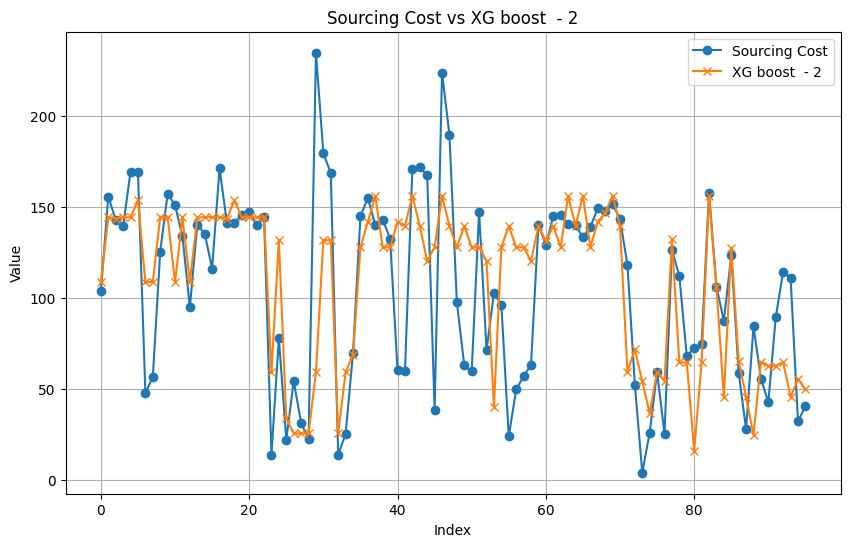

In [ ]:
# Extract Sourcing Cost and predicted values from the test data
sourcing_cost = test_data['Sourcing Cost']
predicted_xgb2 = test_data['xgb_regressor2']

plot_data(sourcing_cost,predicted_xgb2,'Sourcing Cost','XG boost  - 2')

In [ ]:
print(f"Rmse on test data for random forest regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_rg2 ))}")
print(f"R2 score on test data for random forest regressor 2 is : {r2_score(test_data['Sourcing Cost'], y_pred_rg2 )}")
print(f"Rmse on test data for Xg boost regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_xgb2 ))}")
print(f"R2 score on test data for Xg boost regressor 1 is : {r2_score(test_data['Sourcing Cost'], y_pred_xgb2 )}")

Rmse on test data for random forest regressor 1 is : 40.96603810421829
R2 score on test data for random forest regressor 2 is : 0.38140722350220135
Rmse on test data for Xg boost regressor 1 is : 40.97420447697922
R2 score on test data for Xg boost regressor 1 is : 0.38116057222981725


### Training on data with uutliers removed and negative Sourcing Cost values removed

In [ ]:
encoded_data3, encoder = encode_categorical_features(train_data_with_outlier_clipping_neg_rem, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
# Split the data into features (X) and target variable (y)
X2 = encoded_data3
y2 = train_data_with_outlier_clipping_neg_rem['Sourcing Cost']

In [ ]:
rf_regressor3 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor3 = train_model(rf_regressor3,X2,y2)

Mean RMSE for 5-fold cross-validation: 37.60
Mean Squared Error (MSE): 1416.0154430467232
Root Mean Squared Error (RMSE): 37.629980641062296
Mean Absolute Error (MAE): 25.085173763228354
R^2 Score: 0.5335099015660394


In [ ]:
y_pred_rg3 = rf_regressor3.predict(test_data_encoded)
test_data['rf_regressor3'] = y_pred_rg3

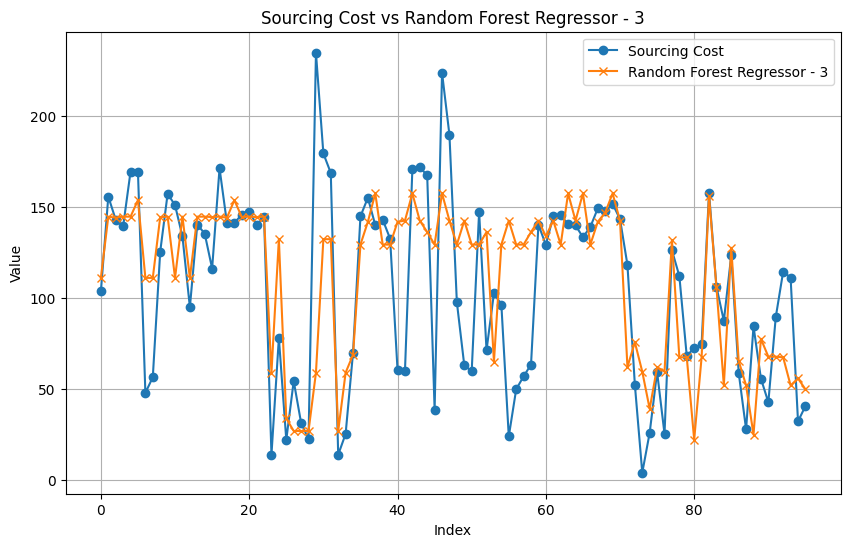

In [ ]:
# Extract Sourcing Cost and predicted values from the test data
sourcing_cost = test_data['Sourcing Cost']
predicted_rf = test_data['rf_regressor3']

plot_data(sourcing_cost,predicted_rf,'Sourcing Cost','Random Forest Regressor - 3')

In [ ]:
xgb_regressor3 = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_regressor3 = train_model(xgb_regressor3,X2,y2)

Mean RMSE for 5-fold cross-validation: 37.60
Mean Squared Error (MSE): 1416.0202587045512
Root Mean Squared Error (RMSE): 37.63004462799043
Mean Absolute Error (MAE): 25.08358519152078
R^2 Score: 0.5335083151026252


In [ ]:
y_pred_xg3 = xgb_regressor3.predict(test_data_encoded)
test_data['xgb_regressor3'] = y_pred_xg3

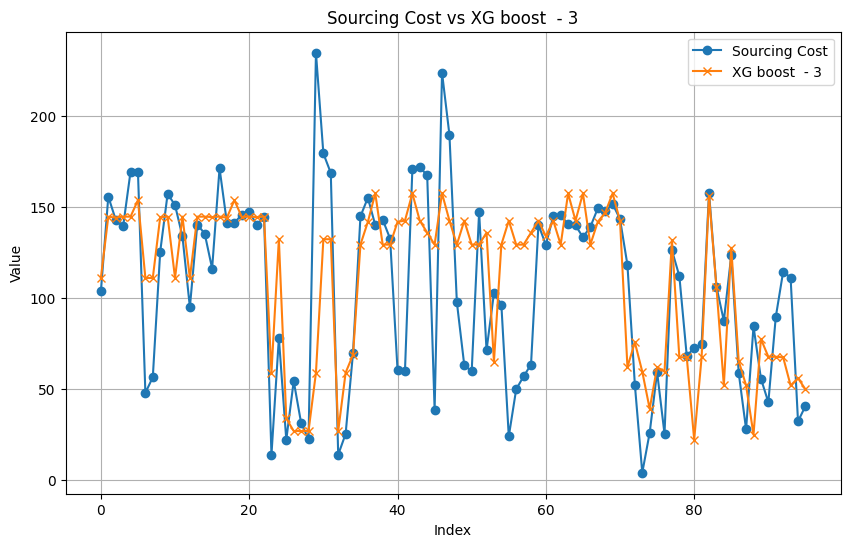

In [ ]:
# Extract Sourcing Cost and predicted values from the test data
sourcing_cost = test_data['Sourcing Cost']
predicted_xg3 = test_data['xgb_regressor3']

plot_data(sourcing_cost,predicted_xg3,'Sourcing Cost','XG boost  - 3')

In [ ]:
print(f"Rmse on test data for random forest regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_rg3 ))}")
print(f"R2 score on test data for random forest regressor 2 is : {r2_score(test_data['Sourcing Cost'], y_pred_rg3 )}")
print(f"Rmse on test data for Xg boost regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_xg3 ))}")
print(f"R2 score on test data for Xg boost regressor 1 is : {r2_score(test_data['Sourcing Cost'], y_pred_xg3 )}")

Rmse on test data for random forest regressor 1 is : 41.15927714193754
R2 score on test data for random forest regressor 2 is : 0.37555758765860425
Rmse on test data for Xg boost regressor 1 is : 41.14896061172968
R2 score on test data for Xg boost regressor 1 is : 0.3758705801165405


### Training on data with outliers clipped and negative Sourcing Cost Values transformed to absolute values

In [ ]:
encoded_data4, encoder = encode_categorical_features(train_data_with_outlier_clipping_abs, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
# Split the data into features (X) and target variable (y)
X4 = encoded_data4
y4 = train_data_with_outlier_clipping_abs['Sourcing Cost']

In [ ]:
rf_regressor4 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor4 = train_model(rf_regressor4,X4,y4)

Mean RMSE for 5-fold cross-validation: 38.23
Mean Squared Error (MSE): 1456.7780426939387
Root Mean Squared Error (RMSE): 38.16776182452855
Mean Absolute Error (MAE): 25.524424439884616
R^2 Score: 0.5503273087035607


In [ ]:
y_pred_rg4 = rf_regressor4.predict(test_data_encoded)
test_data['rf_regressor4'] = y_pred_rg4

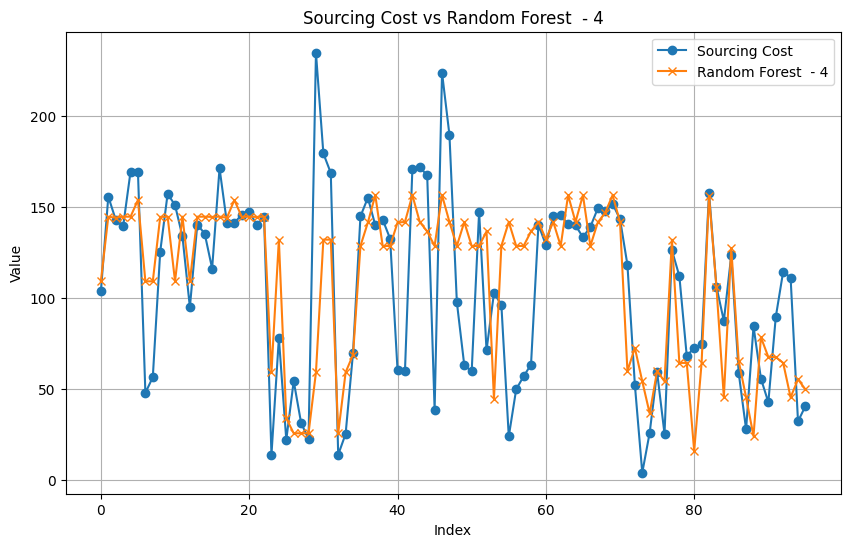

In [ ]:
# Extract Sourcing Cost and predicted values from the test data
sourcing_cost = test_data['Sourcing Cost']
predicted_rf4 = test_data['rf_regressor4']

plot_data(sourcing_cost,predicted_rf4,'Sourcing Cost','Random Forest  - 4')

In [ ]:
xgb_regressor4 = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_regressor4 = train_model(xgb_regressor4,X4,y4)

Mean RMSE for 5-fold cross-validation: 38.23
Mean Squared Error (MSE): 1456.7675842904935
Root Mean Squared Error (RMSE): 38.167624818561784
Mean Absolute Error (MAE): 25.523010531498176
R^2 Score: 0.5503305369636566


In [ ]:
y_pred_xg4 = xgb_regressor4.predict(test_data_encoded)
test_data['xgb_regressor4'] = y_pred_xg4

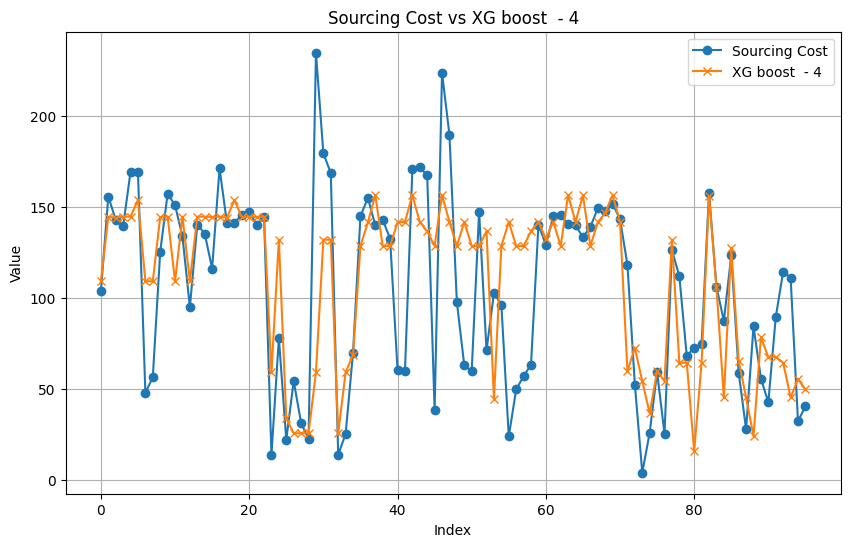

In [ ]:
# Extract Sourcing Cost and predicted values from the test data
sourcing_cost = test_data['Sourcing Cost']
predicted_xg = test_data['xgb_regressor4']

plot_data(sourcing_cost,predicted_xg,'Sourcing Cost','XG boost  - 4')

In [ ]:
print(f"Rmse on test data for random forest regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_rg4 ))}")
print(f"R2 score on test data for random forest regressor 2 is : {r2_score(test_data['Sourcing Cost'], y_pred_rg4 )}")
print(f"Rmse on test data for Xg boost regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_xg4 ))}")
print(f"R2 score on test data for Xg boost regressor 1 is : {r2_score(test_data['Sourcing Cost'], y_pred_xg4 )}")

Rmse on test data for random forest regressor 1 is : 41.48537497219912
R2 score on test data for random forest regressor 2 is : 0.3656236923183871
Rmse on test data for Xg boost regressor 1 is : 41.486592803775
R2 score on test data for Xg boost regressor 1 is : 0.36558644667032114


# 2nd Approach

The second approach was to group all the duplicate and same rows and then sum the sourcing cost along those rows and create a new column quanity which would tell the quantity of the product. Interestingly this approach got an `r2_score` of 0.94, which is way better than the previous approach of getting `r2_score` of 0.56

In [ ]:
# Grouping similar rows together and sum the sourcing cost for each product
grouped_data = train_data_with_outlier_removed_neg_rem.groupby(['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']).agg({'Sourcing Cost': 'sum'}).reset_index()
# Counting the quantity of each product
grouped_data['Quantity'] = train_data_with_outlier_removed_neg_rem.groupby(['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']).size().reset_index(name='Quantity')['Quantity']
# Calculating the average sourcing cost
grouped_data['Average Sourcing Cost'] = grouped_data['Sourcing Cost']/grouped_data['Quantity']
grouped_data.head()

,ProductType,Manufacturer,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Quantity,Average Sourcing Cost
0,NTM1,X1,DIRECT,Large,Liquid,2020-07-01,114574.721,848,135.111699
1,NTM1,X1,DIRECT,Large,Liquid,2020-08-01,106177.277,774,137.179944
2,NTM1,X1,DIRECT,Large,Liquid,2020-09-01,96918.220,702,138.060142
3,NTM1,X1,DIRECT,Large,Liquid,2020-10-01,139215.548,1018,136.753976
4,NTM1,X1,DIRECT,Large,Liquid,2020-11-01,222266.170,1602,138.742928


In [ ]:
# Removing the Month of Sourcing column
grouped_data.drop(['Month of Sourcing'],axis=1, inplace=True)

In [ ]:
categorical_columns = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
encoded_data_grouped, encoder = encode_categorical_features(grouped_data, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:

X = encoded_data_grouped
y = grouped_data['Average Sourcing Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor_agg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_agg.fit(X_train, y_train)

y_pred = rf_regressor_agg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_agg = r2_score(y_test, y_pred)
r2_agg = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (MSE):", np.sqrt(mse))
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2_agg)


Mean Squared Error (MSE): 97.57919939059676
Root Mean Squared Error (MSE): 9.87821843201479
Mean Absolute Error (MAE): 6.953256645212294
R^2 Score: 0.9516585288164913


In [ ]:
test_data_encoded_, encoder = encode_categorical_features(test_data, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
test_data_encoded_.head()

,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Making predictions on the preprocessed test data using the trained model
y_pred_test = rf_regressor_agg.predict(test_data_encoded_)

In [ ]:
test_data['grouped_pred'] = y_pred_test

In [ ]:
print(f"Rmse on test data for random forest regressor is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_test ))}")
print(f"R2 score on test data for random forest regressor is : {r2_score(test_data['Sourcing Cost'], y_pred_test)}")

Rmse on test data for random forest regressor 1 is : 40.4349897236081
R2 score on test data for random forest regressor 2 is : 0.39734107966952514


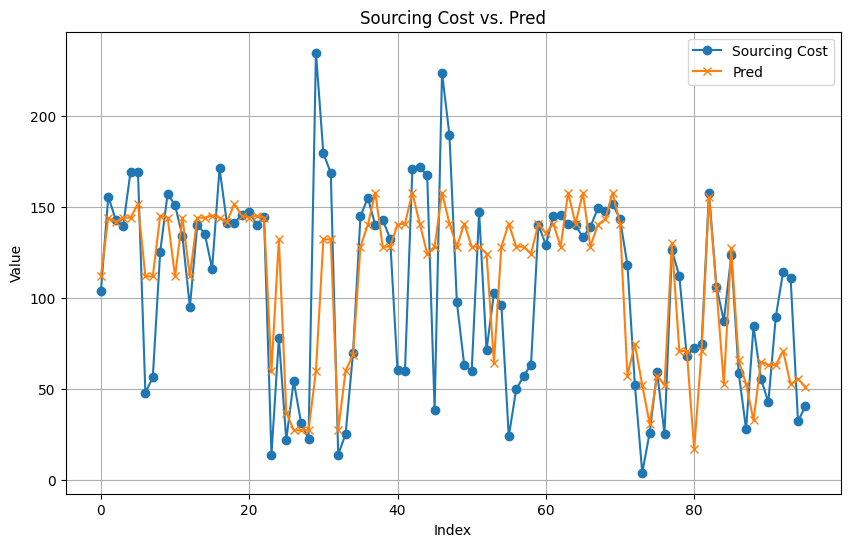

In [ ]:
import matplotlib.pyplot as plt

# Extract Sourcing Cost and predicted values from the test data
sourcing_cost = test_data['Sourcing Cost']
predicted_rf = test_data['grouped_pred']

# Plot the Sourcing Cost and predicted values
plt.figure(figsize=(10, 6))
plt.plot(sourcing_cost, label='Sourcing Cost', marker='o')
plt.plot(predicted_rf, label='Pred', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sourcing Cost vs. Pred')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate adjusted R^2
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2_agg) * (n - 1) / (n - k - 1))

print("Adjusted R^2 Score:", adjusted_r2)

Adjusted R^2 Score: 0.9171024898902365


# 3rd Approach

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AP_Assignment_data/train_data_with_outlier_removed_neg_rem.csv')
df.head()

# Converting 'Month of Sourcing' to datetime as in csv the datatype was changed to object
df['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'])

# setting the  'Month of Sourcing' as the DataFrame index
df.set_index('Month of Sourcing', inplace=True)

# Sorting the DataFrame by the index
df.sort_index(inplace=True)

In [ ]:
# Displaying the first few rows of the dataset
df.head()

,Unnamed: 0,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,lag_1,lag_2,lag_3
Month of Sourcing,,,,,,,,,,,
2020-07-01,274337,NTM2,X1,A29,DIRECT,Large,Powder,5.652000e+01,NaN,NaN,NaN
2020-07-01,420682,NTM1,X1,A1,DIRECT,Small,Powder,1.148990e+02,5.652000e+01,NaN,NaN
2020-07-01,329313,NTM1,X1,A8,DIRECT,Large,Powder,1.369240e+02,1.148990e+02,56.520,NaN
2020-07-01,265720,NTM2,X2,A31,DIRECT,Large,Powder,1.387779e-17,1.369240e+02,114.899,56.520
2020-07-01,265722,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,5.700000e+01,1.387779e-17,136.924,114.899


In [ ]:
# Adding the lagged features for the 'Sourcing Cost' column to capture the historical values of sourcing costs.
# These lagged features will allow the model to consider the effect
# of past sourcing costs on the current value, which can improve prediction accuracy in time series analysis.
for i in range(1, 4):  # Lags from 1 to 3 months
    df[f'lag_{i}'] = df['Sourcing Cost'].shift(i)

In [ ]:
# Rolling mean and standard deviation for the past 3 months to help capture the short-term trends,
# variability, and distributional characteristics in sourcing costs

df['rolling_mean_3'] = df['Sourcing Cost'].rolling(window=3).mean()
df['rolling_std_3'] = df['Sourcing Cost'].rolling(window=3).std()

# Additional rolling quantiles
df['rolling_quantile_25'] = df['Sourcing Cost'].rolling(window=3).quantile(0.25)
df['rolling_quantile_75'] = df['Sourcing Cost'].rolling(window=3).quantile(0.75)

In [ ]:
# Extracting month, year, and quarter from the index for giving the model features for finding out seasonality or cyclicity
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter

In [ ]:
# Checking for the null values
df.isnull().sum()

Unnamed: 0          0
ProductType         0
Manufacturer        0
Area Code           0
Sourcing Channel    0
Product Size        0
Product Type        0
Sourcing Cost       0
lag_1               1
lag_2               2
lag_3               3
dtype: int64

In [ ]:
# Dropping the missing values
df.dropna(inplace=True)  # Dropping rows where any NaN values exist

In [ ]:
# Dropping the irrelevant columns
df.drop(['Unnamed: 0','Area Code'],axis=1,inplace=True)

In [ ]:
# Data Preperatin for the model feature matrix X and target variable y
X = df.drop('Sourcing Cost', axis=1)
y = df['Sourcing Cost']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Forming the X_train, X_test, y_train and y_test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

#predictions on the test set
predictions = rf.predict(X_test)

# Evaluation of the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root mean squared error {rmse}")


Mean Squared Error: 3.1780752174349276
R^2 Score: 0.9989149280127544
Root mean squared error 1.7827156860910063


In [ ]:
import pickle

filename = '/content/drive/MyDrive/AP_Assignment_data/best_random_forest_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(rf, file)

print(f"Model saved to {filename}")

In [ ]:
# Calculation of Adjusted R2_Score
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R^2 Score:", adjusted_r2)

Adjusted R^2 Score: 0.998914725235358


In [ ]:
test_data1 = pd.read_excel("/content/drive/MyDrive/AP_Assignment_data/Test_data.xlsx")

In [ ]:
test_data2 = pd.read_excel("/content/drive/MyDrive/AP_Assignment_data/Test_data.xlsx")

In [ ]:
test_data1['Month of Sourcing'] = pd.to_datetime(test_data1['Month of Sourcing'])
test_data1.set_index('Month of Sourcing', inplace=True)
test_data1.drop('Area Code',axis=1,inplace=True)

In [ ]:
# Appending the last few rows of the training data to the test data for lag and rolling calculations
# As lag features involve using previous values of a time series as predictors for future values.
# By appending the last few rows of the training data to the test data, we ensure that the test data has access to the most recent historical values needed to create lag features.

combined_data = pd.concat([df.tail(3), test_data1])

for i in range(1, 4):  # Adding lags from 1 to 3 months
    combined_data[f'lag_{i}'] = combined_data['Sourcing Cost'].shift(i)

# Rolling mean and standard deviation
combined_data['rolling_mean_3'] = combined_data['Sourcing Cost'].rolling(window=3).mean()
combined_data['rolling_std_3'] = combined_data['Sourcing Cost'].rolling(window=3).std()

# Rolling quantiles
combined_data['rolling_quantile_25'] = combined_data['Sourcing Cost'].rolling(window=3).quantile(0.25)
combined_data['rolling_quantile_75'] = combined_data['Sourcing Cost'].rolling(window=3).quantile(0.75)

test_data1 = combined_data.iloc[3:]


In [ ]:
# Extracting month, year, and quarter from the index
test_data1['month'] = test_data1.index.month
test_data1['year'] = test_data1.index.year
test_data1['quarter'] = test_data1.index.quarter

<ipython-input-116-f54e025b4485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['month'] = test_data1.index.month
<ipython-input-116-f54e025b4485>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['year'] = test_data1.index.year
<ipython-input-116-f54e025b4485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
# Filling missing values with backfill
test_data1.fillna(method='ffill', inplace=True)

<ipython-input-117-c118d9a3136f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1.fillna(method='ffill', inplace=True)  # You can also consider backfill or a specific scalar value


In [ ]:
# Applying pd.get_dummies for encoding
test_data1 = pd.get_dummies(test_data1, drop_first=True)

# This loop is for ensuring that the test data has all columns as in the train data
for column in X_train.columns:
    if column not in test_data1.columns:
        test_data1[column] = 0

test_data1 = test_data1[X_train.columns]


In [ ]:
preds= rf.predict(test_data1)
print(preds)

[103.92422 154.81404 143.71541 139.47814 169.13323 169.33765  48.48557
  53.03159 122.60477 157.31678 150.88192 133.94064  94.91477 140.63912
 135.43758 117.40872 170.05922 141.83357 141.26461 145.41913 147.56156
 140.74644 144.60595  14.49666  78.04898  25.55142  58.31994  30.39774
  23.33923 237.16782 175.69126 176.81308  13.47736  25.83112  67.05335
 144.46363 155.19006 140.05415 143.25001 133.03785  60.10786  57.32538
 170.20445 172.00101 169.52304  39.61264 217.48518 190.37592  97.08225
  64.63959  57.55676 146.83259  70.38021 101.50993  98.25604  62.94839
  40.72054  55.74673  62.02489 139.477   129.14508 144.37778 145.16903
 141.29881 139.9544  134.25017 139.03684 149.30371 147.78643 151.57552
 143.31176 118.05531  53.09614   3.91955  50.46807  57.34156  25.9685
 123.71371 116.82664  69.5319   75.46268  74.67575 158.19499 106.78816
  86.43128 124.36025  64.92197  28.43472  84.91171  57.1585   42.85418
  85.66144 106.09602 107.38155  34.5768   43.02618]


In [ ]:
test_data2['preds'] = preds

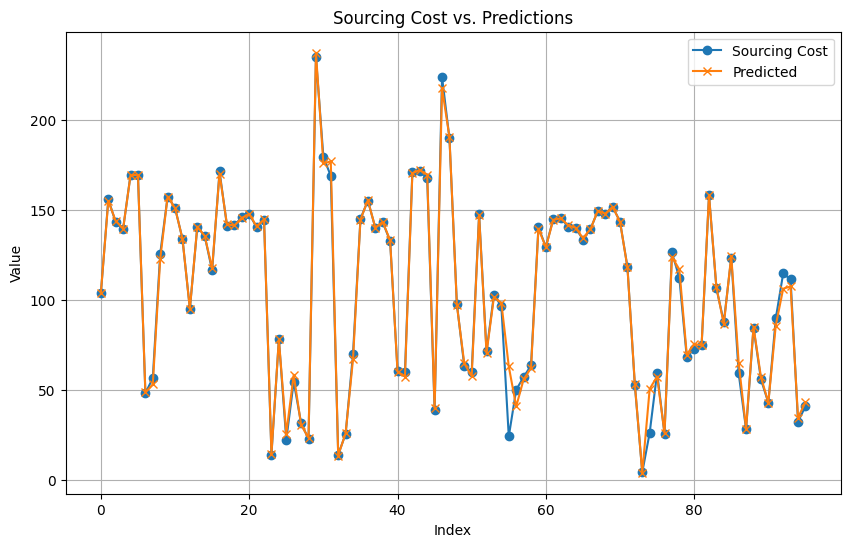

In [ ]:
import matplotlib.pyplot as plt

sourcing_cost = test_data2['Sourcing Cost']
predicted_rf = test_data2['preds']

# Plotting the Sourcing Cost and predicted values
plt.figure(figsize=(10, 6))
plt.plot(sourcing_cost, label='Sourcing Cost', marker='o')
plt.plot(predicted_rf, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sourcing Cost vs. Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculating the rmse and r2 score on test data
print(f"Rmse on test data for random Forest regressor 1 is : {np.sqrt(mean_squared_error(test_data2['Sourcing Cost'], preds ))}")
print(f"R2 score on test data for random Forest regressor 2 is : {r2_score(test_data2['Sourcing Cost'], preds )}")

Rmse on test data for random Forest regressor 1 is : 5.2109098898414965
R2 score on test data for random Forest regressor 2 is : 0.9899911532097075
